In [ ]:
!pip install pandas==1.5.3 # this line is needed after pandas upgraded to version 2.0.0
!pip install -U ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 20.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.0
    Uninstalling pandas-2.0.0:
      Successfully uninstalled pandas-2.0.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## install necessary libraries
!pip install wrds
!pip install swig
!pip install pyportfolioopt
## install finrl library
!pip install -q condacolab
import condacolab
condacolab.install()
!apt-get update -y -qq && apt-get install -y -qq cmake libopenmpi-dev python3-dev zlib1g-dev libgl1-mesa-glx swig
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.5 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.9
    Uninstalling SQLAlchemy-2.0.9:
      Successfully uninstalled SQLAlchemy-2.0.9
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.9 MB/s eta 0:00:00
⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting ker

In [ ]:
API_KEY = "PKOD4HWMOBLR8OVXTV9E"
API_SECRET = "qZ0YU9viniZnfWTtPXfsbwXIEokb2wHw2gdSWpcq"
APCA_API_BASE_URL = 'https://paper-api.alpaca.markets'
data_url = 'wss://data.alpaca.markets'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.meta.env_stock_trading.env_stocktrading_np import StockTradingEnv as StockTradingEnvNP
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

In [ ]:
from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])


## Download daily DJI30 data with Yahoo

In [ ]:
TRAIN_START_DATE = '2009-01-01'
TRAIN_END_DATE = '2020-07-01'
TRADE_START_DATE = '2020-07-01'
TRADE_END_DATE = '2021-10-31'
df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = config_tickers.DOW_30_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
tic        object
day         int64
dtype: object

In [ ]:
df

,date,open,high,low,close,volume,tic,day
0,2009-01-02,3.067143,3.251429,3.041429,2.758535,746015200,AAPL,4
1,2009-01-02,58.590000,59.080002,57.750000,43.832626,6547900,AMGN,4
2,2009-01-02,18.570000,19.520000,18.400000,15.365303,10955700,AXP,4
3,2009-01-02,42.799999,45.560001,42.779999,33.941090,7010200,BA,4
4,2009-01-02,44.910000,46.980000,44.709999,31.579332,7117200,CAT,4
...,...,...,...,...,...,...,...,...
94326,2021-10-29,454.410004,461.390015,453.059998,453.169403,2497800,UNH,4
94327,2021-10-29,209.210007,213.669998,208.539993,209.400620,14329800,V,4
94328,2021-10-29,52.500000,53.049999,52.410000,49.462276,17763200,VZ,4
94329,2021-10-29,46.860001,47.279999,46.770000,43.929260,4999000,WBA,4


## Download DJI30 Data with Alpaca

For this experiment we will be using DJI30 data from the past 30 days up until yesterday. The first 23 days will be used for training while the last 7 days leading up to yesterday will be used for testing.

In [ ]:
DP = DataProcessor(data_source = 'alpaca',
                   API_KEY = API_KEY,
                   API_SECRET = API_SECRET,
                   APCA_API_BASE_URL = APCA_API_BASE_URL)

Alpaca successfully connected


In [ ]:
from datetime import datetime
from datetime import timedelta
START_DATE = datetime.now() - timedelta(days=31)
END_DATE = datetime.now()
# END_DATE = datetime.now() - timedelta(days=1)

In [ ]:
data = DP.download_data(start_date = START_DATE.strftime('%Y-%m-%d'),
                        end_date = END_DATE.strftime('%Y-%m-%d'),
                        ticker_list = config_tickers.DOW_30_TICKER,
                        time_interval= '1min')

/usr/local/lib/python3.9/site-packages/finrl/meta/data_processors/processor_alpaca.py:52: FutureWarning: Timedelta.delta is deprecated and will be removed in a future version.
  if pd.Timedelta(time_interval).delta < day_delta:


In [ ]:
data

,timestamp,open,high,low,close,volume,trade_count,vwap,tic
0,2023-03-20 10:30:00-04:00,155.3300,155.5197,155.3200,155.4500,211739,1917,155.444620,AAPL
1,2023-03-20 10:31:00-04:00,155.4500,155.5814,155.4500,155.5650,155836,1307,155.515260,AAPL
2,2023-03-20 10:32:00-04:00,155.5700,155.5900,155.2400,155.2800,203539,1707,155.414785,AAPL
3,2023-03-20 10:33:00-04:00,155.2895,155.4400,155.2350,155.4350,106889,1042,155.330476,AAPL
4,2023-03-20 10:34:00-04:00,155.4350,155.5200,155.3700,155.4350,109511,1087,155.450038,AAPL
...,...,...,...,...,...,...,...,...,...
205349,2023-04-17 16:14:00-04:00,149.5200,149.5200,149.5200,149.5200,1197,1,149.520000,WMT
205350,2023-04-17 16:37:00-04:00,149.7600,149.7600,149.7600,149.7600,452,2,149.757876,WMT
205351,2023-04-17 16:40:00-04:00,149.7999,149.7999,149.7999,149.7999,220,1,149.799900,WMT
205352,2023-04-17 16:42:00-04:00,149.5300,149.5300,149.5300,149.5300,150,3,149.526667,WMT


In [ ]:
data = DP.clean_data(data)
data = DP.add_technical_indicator(data, INDICATORS)
data = DP.add_vix(data)
data = DP.add_turbulence(data)


The price of the first row for ticker  AAPL  is NaN.  It will filled with the first valid price.
The price of the first row for ticker  AMGN  is NaN.  It will filled with the first valid price.
The price of the first row for ticker  AXP  is NaN.  It will filled with the first valid price.
The price of the first row for ticker  BA  is NaN.  It will filled with the first valid price.
The price of the first row for ticker  CAT  is NaN.  It will filled with the first valid price.
The price of the first row for ticker  CRM  is NaN.  It will filled with the first valid price.
The price of the first row for ticker  CSCO  is NaN.  It will filled with the first valid price.
The price of the first row for ticker  CVX  is NaN.  It will filled with the first valid price.
The price of the first row for ticker  DIS  is NaN.  It will filled with the first valid price.
The price of the first row for ticker  DOW  is NaN.  It will filled with the first valid price.
The price of the first row for ticker 

/usr/local/lib/python3.9/site-packages/finrl/meta/data_processors/processor_alpaca.py:52: FutureWarning: Timedelta.delta is deprecated and will be removed in a future version.
  if pd.Timedelta(time_interval).delta < day_delta:


The price of the first row for ticker  VIXY  is NaN.  It will filled with the first valid price.


In [ ]:
data.head()

,timestamp,open,high,low,close,volume,tic,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,VIXY,turbulence
0,2023-03-20 09:30:00-04:00,155.45,155.45,155.45,155.45,0.0,AAPL,0.0,NaN,NaN,NaN,NaN,NaN,155.45,155.45,11.13,0.0
1,2023-03-20 09:30:00-04:00,232.67,232.67,232.67,232.67,0.0,AMGN,0.0,NaN,NaN,NaN,NaN,NaN,232.67,232.67,11.13,0.0
2,2023-03-20 09:30:00-04:00,160.03,160.03,160.03,160.03,0.0,AXP,0.0,NaN,NaN,NaN,NaN,NaN,160.03,160.03,11.13,0.0
3,2023-03-20 09:30:00-04:00,204.75,204.75,204.75,204.75,0.0,BA,0.0,NaN,NaN,NaN,NaN,NaN,204.75,204.75,11.13,0.0
4,2023-03-20 09:30:00-04:00,220.67,220.67,220.67,220.67,0.0,CAT,0.0,NaN,NaN,NaN,NaN,NaN,220.67,220.67,11.13,0.0


In [ ]:
data.isna().sum()

timestamp          0
open               0
high               0
low                0
close              0
volume             0
tic                0
macd               0
boll_ub           30
boll_lb           30
rsi_30          1831
cci_30          5207
dx_30           1800
close_30_sma       0
close_60_sma       0
VIXY               0
turbulence         0
dtype: int64

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

checkdf = data.select_dtypes(include=numerics)
np.isinf(checkdf).sum() + np.isneginf(checkdf).sum()

open            0
high            0
low             0
close           0
volume          0
macd            0
boll_ub         0
boll_lb         0
rsi_30          0
cci_30          0
dx_30           0
close_30_sma    0
close_60_sma    0
VIXY            0
turbulence      0
dtype: int64

As we can see that there are nan and infinte values within our data, we need to cleanse the data with the following method, and replace those invalid values.

In [ ]:
data = data.fillna(method="ffill").fillna(method="bfill").replace([np.inf, -np.inf], 0).rename(columns={"VIXY":"vix"})
data.head()

,timestamp,open,high,low,close,volume,tic,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2023-03-20 09:30:00-04:00,155.45,155.45,155.45,155.45,0.0,AAPL,0.0,155.45,155.45,100.0,0.0,100.0,155.45,155.45,11.13,0.0
1,2023-03-20 09:30:00-04:00,232.67,232.67,232.67,232.67,0.0,AMGN,0.0,155.45,155.45,100.0,0.0,100.0,232.67,232.67,11.13,0.0
2,2023-03-20 09:30:00-04:00,160.03,160.03,160.03,160.03,0.0,AXP,0.0,155.45,155.45,100.0,0.0,100.0,160.03,160.03,11.13,0.0
3,2023-03-20 09:30:00-04:00,204.75,204.75,204.75,204.75,0.0,BA,0.0,155.45,155.45,100.0,0.0,100.0,204.75,204.75,11.13,0.0
4,2023-03-20 09:30:00-04:00,220.67,220.67,220.67,220.67,0.0,CAT,0.0,155.45,155.45,100.0,0.0,100.0,220.67,220.67,11.13,0.0


In [ ]:
data.isna().sum()

timestamp       0
open            0
high            0
low             0
close           0
volume          0
tic             0
macd            0
boll_ub         0
boll_lb         0
rsi_30          0
cci_30          0
dx_30           0
close_30_sma    0
close_60_sma    0
vix             0
turbulence      0
dtype: int64

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

checkdf = data.select_dtypes(include=numerics)
np.isinf(checkdf).sum() + np.isneginf(checkdf).sum()

open            0
high            0
low             0
close           0
volume          0
macd            0
boll_ub         0
boll_lb         0
rsi_30          0
cci_30          0
dx_30           0
close_30_sma    0
close_60_sma    0
vix             0
turbulence      0
dtype: int64

In [ ]:
data.to_pickle("./datasets/alpaca_1m(30days).pkl")

In [ ]:
# load alpaca minutely data here
data = pd.read_pickle("./datasets/alpaca_1m(30days).pkl")
data.head()

,timestamp,open,high,low,close,volume,tic,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2023-03-20 09:30:00-04:00,155.45,155.45,155.45,155.45,0.0,AAPL,0.0,155.45,155.45,100.0,0.0,100.0,155.45,155.45,11.13,0.0
1,2023-03-20 09:30:00-04:00,232.67,232.67,232.67,232.67,0.0,AMGN,0.0,155.45,155.45,100.0,0.0,100.0,232.67,232.67,11.13,0.0
2,2023-03-20 09:30:00-04:00,160.03,160.03,160.03,160.03,0.0,AXP,0.0,155.45,155.45,100.0,0.0,100.0,160.03,160.03,11.13,0.0
3,2023-03-20 09:30:00-04:00,204.75,204.75,204.75,204.75,0.0,BA,0.0,155.45,155.45,100.0,0.0,100.0,204.75,204.75,11.13,0.0
4,2023-03-20 09:30:00-04:00,220.67,220.67,220.67,220.67,0.0,CAT,0.0,155.45,155.45,100.0,0.0,100.0,220.67,220.67,11.13,0.0


In [ ]:
INDICATORS

['macd',
 'boll_ub',
 'boll_lb',
 'rsi_30',
 'cci_30',
 'dx_30',
 'close_30_sma',
 'close_60_sma']

In [ ]:
data = data.rename(columns={"timestamp":"date"})
data.head()

,date,open,high,low,close,volume,tic,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2023-03-20 09:30:00-04:00,155.45,155.45,155.45,155.45,0.0,AAPL,0.0,155.45,155.45,100.0,0.0,100.0,155.45,155.45,11.13,0.0
1,2023-03-20 09:30:00-04:00,232.67,232.67,232.67,232.67,0.0,AMGN,0.0,155.45,155.45,100.0,0.0,100.0,232.67,232.67,11.13,0.0
2,2023-03-20 09:30:00-04:00,160.03,160.03,160.03,160.03,0.0,AXP,0.0,155.45,155.45,100.0,0.0,100.0,160.03,160.03,11.13,0.0
3,2023-03-20 09:30:00-04:00,204.75,204.75,204.75,204.75,0.0,BA,0.0,155.45,155.45,100.0,0.0,100.0,204.75,204.75,11.13,0.0
4,2023-03-20 09:30:00-04:00,220.67,220.67,220.67,220.67,0.0,CAT,0.0,155.45,155.45,100.0,0.0,100.0,220.67,220.67,11.13,0.0


In [ ]:
data['date']

0        2023-03-20 09:30:00-04:00
1        2023-03-20 09:30:00-04:00
2        2023-03-20 09:30:00-04:00
3        2023-03-20 09:30:00-04:00
4        2023-03-20 09:30:00-04:00
                    ...           
245725   2023-04-18 15:59:00-04:00
245726   2023-04-18 15:59:00-04:00
245727   2023-04-18 15:59:00-04:00
245728   2023-04-18 15:59:00-04:00
245729   2023-04-18 15:59:00-04:00
Name: date, Length: 245730, dtype: datetime64[ns, America/New_York]

# Split data for training and testing



Delocalize the timezone here

In [ ]:
from datetime import datetime
processed = data.copy()
# processed['date'] = processed['date'].apply(lambda x: x.strftime("%Y-%m-%d")).apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
processed['date'] = processed['date'].dt.tz_localize(None)
START_DATE_TRAIN = START_DATE
END_DATE_TRAIN = START_DATE+timedelta(24)
START_DATE_TEST = START_DATE+timedelta(24)
END_DATE_TEST = END_DATE
train_df = data_split(processed, START_DATE_TRAIN, END_DATE_TRAIN)
test_df = data_split(processed, START_DATE_TEST, END_DATE_TEST)

In [ ]:
train_df

,date,open,high,low,close,volume,tic,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2023-03-20 09:30:00,155.450,155.45,155.45,155.45,0.0,AAPL,0.000000,155.450000,155.450000,100.000000,0.000000,100.000000,155.450000,155.450000,11.13,0.000000
0,2023-03-20 09:30:00,232.670,232.67,232.67,232.67,0.0,AMGN,0.000000,155.450000,155.450000,100.000000,0.000000,100.000000,232.670000,232.670000,11.13,0.000000
0,2023-03-20 09:30:00,160.030,160.03,160.03,160.03,0.0,AXP,0.000000,155.450000,155.450000,100.000000,0.000000,100.000000,160.030000,160.030000,11.13,0.000000
0,2023-03-20 09:30:00,204.750,204.75,204.75,204.75,0.0,BA,0.000000,155.450000,155.450000,100.000000,0.000000,100.000000,204.750000,204.750000,11.13,0.000000
0,2023-03-20 09:30:00,220.670,220.67,220.67,220.67,0.0,CAT,0.000000,155.450000,155.450000,100.000000,0.000000,100.000000,220.670000,220.670000,11.13,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5850,2023-04-10 15:59:00,514.770,515.39,514.73,515.38,57366.0,UNH,0.481232,515.717709,513.666391,69.624813,84.791792,36.732878,514.074867,513.404582,8.65,216.643471
5850,2023-04-10 15:59:00,226.060,226.48,226.05,226.48,147283.0,V,0.041337,226.303984,225.613016,64.223889,234.890021,38.174294,225.986877,226.087355,8.65,216.643471
5850,2023-04-10 15:59:00,39.325,39.35,39.32,39.35,444957.0,VZ,0.031621,39.350533,39.168407,65.385499,195.158598,64.817917,39.238593,39.229372,8.65,216.643471
5850,2023-04-10 15:59:00,36.085,36.12,36.08,36.12,149206.0,WBA,0.011966,36.101852,35.997278,60.654602,296.229994,31.305156,36.047170,36.062128,8.65,216.643471


In [ ]:
train_df.shape

(175530, 17)

In [ ]:
test_df

,date,open,high,low,close,volume,tic,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2023-04-11 09:30:00,162.025,162.025,162.0250,162.025,0.0,AAPL,0.055965,161.992880,161.649110,60.950282,251.698942,27.201780,161.787303,161.714972,8.650,0.067886
0,2023-04-11 09:30:00,250.930,250.930,250.9300,250.930,0.0,AMGN,0.096040,251.043424,249.974886,54.965655,168.830668,24.470131,250.424937,250.667862,8.650,0.067886
0,2023-04-11 09:30:00,161.140,161.140,161.1400,161.140,0.0,AXP,0.060737,161.120556,160.552654,62.528058,242.593962,29.196241,160.841523,160.814308,8.650,0.067886
0,2023-04-11 09:30:00,210.800,210.800,210.8000,210.800,0.0,BA,0.040689,210.787423,210.117577,58.271096,245.123999,36.008551,210.437167,210.467908,8.650,0.067886
0,2023-04-11 09:30:00,215.620,215.620,215.6200,215.620,0.0,CAT,0.125821,215.658801,214.969299,64.640059,155.741682,42.074911,215.210200,215.147965,8.650,0.067886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,2023-04-17 15:59:00,505.210,505.620,504.9000,505.470,146363.0,UNH,-0.164481,506.636347,504.927653,49.462602,-130.807147,13.380181,505.912500,505.625497,7.942,181.395662
1949,2023-04-17 15:59:00,233.260,233.490,233.2501,233.490,108198.0,V,0.180055,233.441061,232.380619,74.478494,192.282229,71.207267,232.816560,232.700535,7.942,181.395662
1949,2023-04-17 15:59:00,39.460,39.470,39.4400,39.470,246224.0,VZ,0.003743,39.487533,39.414527,57.185481,50.632911,13.227239,39.451270,39.453647,7.942,181.395662
1949,2023-04-17 15:59:00,35.910,35.940,35.9050,35.930,98673.0,WBA,0.009301,35.958081,35.824529,58.896818,31.030313,29.480493,35.909370,35.882588,7.942,181.395662


In [ ]:
test_df.shape

(58500, 17)

# Stock Trading Env Using StockTradingEnv

The StockTradingEnv as imported from FinRL is modified here to also include the VIX indicator and volume as input data for the environment.

In [ ]:
stock_dimension = len(train_df.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 301


In [ ]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "turbulence_threshold": 30,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train_df.rename(columns={"VIXY":"vix"}), **env_kwargs)

In [ ]:
env_train, obs = e_train_gym.get_sb_env()
print(env_train)

## A2C Algorithm

In [100]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

# set up logger
tmp_path = RESULTS_DIR + '/a2c'
new_logger_a2c = configure(tmp_path, ["stdout", "csv", "tensorboard"])
# Set new logger
model_a2c.set_logger(new_logger_a2c)

{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device
Logging to results/a2c


In [101]:
train_df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'tic', 'macd',
       'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30', 'close_30_sma',
       'close_60_sma', 'vix', 'turbulence'],
      dtype='object')

In [ ]:
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=50000)

-------------------------------------
| time/                 |           |
|    fps                | 24        |
|    iterations         | 100       |
|    time_elapsed       | 20        |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -43.1     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | 8.38e+05  |
|    reward             | 7288.9204 |
|    std                | 1.02      |
|    value_loss         | 5.52e+08  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 25        |
|    iterations         | 200       |
|    time_elapsed       | 39        |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -43.1     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updat

In [ ]:
type(trained_a2c)

stable_baselines3.a2c.a2c.A2C

In [ ]:
trained_a2c.save("./trained_models/a2cmodel-alpaca1mindata")

In [102]:
load_agent = DRLAgent(env = env_train)
load_a2c = agent.get_model("a2c")
load_a2c_trained = load_a2c.load("./trained_models/a2cmodel-alpaca1mindata")
trained_a2c = load_a2c_trained

{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device


## PPO Algorithm

In [103]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)


# set up logger
tmp_path = RESULTS_DIR + '/ppo'
new_logger_ppo = configure(tmp_path, ["stdout", "csv", "tensorboard"])
# Set new logger
model_ppo.set_logger(new_logger_ppo)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cpu device
Logging to results/ppo


In [ ]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=50000)

-----------------------------------
| time/              |            |
|    fps             | 30         |
|    iterations      | 1          |
|    time_elapsed    | 67         |
|    total_timesteps | 2048       |
| train/             |            |
|    reward          | -5.7592454 |
-----------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 30           |
|    iterations           | 2            |
|    time_elapsed         | 135          |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0001110718 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -42.6        |
|    explained_variance   | -1.19e-07    |
|    learning_rate        | 0.00025      |
|    loss                 | 5.03e+09     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.

In [ ]:
trained_ppo.save("./trained_models/ppomodel-alpaca1mindata")

In [104]:
load_agent = DRLAgent(env = env_train)
load_ppo = agent.get_model("ppo")
load_ppo_trained = load_ppo.load("./trained_models/ppomodel-alpaca1mindata")
trained_ppo = load_ppo_trained

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 64}
Using cpu device


## DDPG Algorithm

In [105]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

# set up logger
tmp_path = RESULTS_DIR + '/ddpg'
new_logger_ddpg = configure(tmp_path, ["stdout", "csv", "tensorboard"])
# Set new logger
model_ddpg.set_logger(new_logger_ddpg)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device
Logging to results/ddpg


In [ ]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=50000)

day: 6240, episode: 20
begin_total_asset: 1000000.00
end_total_asset: 273543878379.84
total_reward: 273542878379.84
total_cost: 274749837.04
total_trades: 166026
Sharpe: 0.201
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 20        |
|    time_elapsed    | 1207      |
|    total_timesteps | 24964     |
| train/             |           |
|    actor_loss      | -5.18e+07 |
|    critic_loss     | 6.82e+12  |
|    learning_rate   | 0.001     |
|    n_updates       | 18723     |
|    reward          | 77684.04  |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 19        |
|    time_elapsed    | 2540      |
|    total_timesteps | 49928     |
| train/             |           |
|    actor_loss      | -2.95e+06 |
|    critic_loss     | 5.1e+09   |
|    learning_rate   | 0.001     |
|    n_updates     

In [ ]:
trained_ddpg.save("./trained_models/ddpgmodel-alpaca1mindata")

In [106]:
load_agent = DRLAgent(env = env_train)
load_ddpg = agent.get_model("ddpg")
load_ddpg_trained = load_ddpg.load("./trained_models/ddpgmodel-alpaca1mindata")
trained_ddpg = load_ddpg_trained

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device


## TD3 Algorithm

In [97]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100, 
              "buffer_size": 1000000, 
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

# set up logger
tmp_path = RESULTS_DIR + '/td3'
new_logger_td3 = configure(tmp_path, ["stdout", "csv", "tensorboard"])
# Set new logger
model_td3.set_logger(new_logger_td3)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device
Logging to results/td3


In [98]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=30000)

---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 14       |
|    time_elapsed    | 1585     |
|    total_timesteps | 23404    |
| train/             |          |
|    actor_loss      | -164     |
|    critic_loss     | 644      |
|    learning_rate   | 0.001    |
|    n_updates       | 17553    |
|    reward          | 0.0      |
---------------------------------


In [99]:
trained_td3.save("./trained_models/td3model-alpaca1mindata")

In [ ]:
load_agent = DRLAgent(env = env_train)
load_td3 = agent.get_model("ppo")
load_td3_trained = load_ppo.load("./trained_models/td3model-alpaca1mindata")
trained_td3 = load_ppo_trained

# Trading (Out of Sample Data)
In this section, we try to analyze the performances of the models that we have developed on unforeseen data and analyze their results. After that, a backtest on DJI30 for the same time period will be performed.

In [107]:
buy_cost_list = sell_cost_list = [0] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "turbulence_threshold": 30,
    "reward_scaling": 1e-4
}

In [108]:
e_trade_gym = StockTradingEnv(df = test_df,  **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [109]:
trained_model = trained_a2c
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model= trained_model, 
    environment = e_trade_gym)

hit end!


In [110]:
df_actions_a2c

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
date,,,,,,,,,,,,,,,,,,,,,
2023-04-11 09:30:00,24,0,100,100,100,100,100,100,100,100,...,100,100,0,0,84,100,0,0,0,100
2023-04-11 09:31:00,24,0,100,100,100,100,100,100,100,100,...,100,100,0,0,84,100,0,0,0,100
2023-04-11 09:32:00,24,0,100,100,100,100,100,100,100,100,...,100,100,0,0,84,100,0,0,0,100
2023-04-11 09:33:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100
2023-04-11 09:34:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17 15:54:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-04-17 15:55:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-04-17 15:56:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
df_account_value_a2c

,date,account_value
0,2023-04-11 09:30:00,1.000000e+06
1,2023-04-11 09:31:00,1.000000e+06
2,2023-04-11 09:32:00,1.000000e+06
3,2023-04-11 09:33:00,1.000000e+06
4,2023-04-11 09:34:00,1.000000e+06
...,...,...
1945,2023-04-17 15:55:00,1.005591e+06
1946,2023-04-17 15:56:00,1.005591e+06
1947,2023-04-17 15:57:00,1.005591e+06
1948,2023-04-17 15:58:00,1.005591e+06


In [112]:
trained_model = trained_ppo
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model= trained_model, 
    environment = e_trade_gym)

hit end!


In [113]:
df_actions_ppo

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
date,,,,,,,,,,,,,,,,,,,,,
2023-04-11 09:30:00,13,28,0,0,0,15,37,0,14,8,...,12,0,0,0,31,11,0,5,0,27
2023-04-11 09:31:00,13,28,0,0,0,15,37,0,14,8,...,12,0,0,0,31,11,0,5,0,27
2023-04-11 09:32:00,13,28,0,0,0,15,37,0,14,8,...,12,0,0,0,31,11,0,5,0,27
2023-04-11 09:33:00,13,28,0,0,0,15,37,0,14,8,...,12,0,0,0,31,11,0,5,0,27
2023-04-11 09:34:00,13,28,0,0,0,15,37,0,14,8,...,12,0,0,0,31,11,0,5,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17 15:54:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-04-17 15:55:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-04-17 15:56:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
df_account_value_ppo

,date,account_value
0,2023-04-11 09:30:00,1.000000e+06
1,2023-04-11 09:31:00,1.000000e+06
2,2023-04-11 09:32:00,1.000000e+06
3,2023-04-11 09:33:00,1.000000e+06
4,2023-04-11 09:34:00,1.000000e+06
...,...,...
1945,2023-04-17 15:55:00,1.002925e+06
1946,2023-04-17 15:56:00,1.002925e+06
1947,2023-04-17 15:57:00,1.002925e+06
1948,2023-04-17 15:58:00,1.002925e+06


In [115]:
trained_model = trained_ddpg
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model= trained_model, 
    environment = e_trade_gym)

hit end!


In [116]:
df_actions_ddpg

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
date,,,,,,,,,,,,,,,,,,,,,
2023-04-11 09:30:00,0,0,100,0,100,100,0,100,0,0,...,0,100,100,100,0,0,0,100,100,100
2023-04-11 09:31:00,0,0,100,0,100,100,0,100,0,0,...,0,100,100,100,0,0,0,100,100,100
2023-04-11 09:32:00,0,0,100,0,100,100,0,100,0,0,...,0,100,100,100,0,0,0,100,100,100
2023-04-11 09:33:00,0,0,7,0,100,100,0,0,0,0,...,0,100,100,100,0,0,0,3,100,100
2023-04-11 09:34:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-100,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17 15:54:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-04-17 15:55:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-04-17 15:56:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
df_account_value_ddpg

,date,account_value
0,2023-04-11 09:30:00,1.000000e+06
1,2023-04-11 09:31:00,1.000000e+06
2,2023-04-11 09:32:00,1.000000e+06
3,2023-04-11 09:33:00,1.000000e+06
4,2023-04-11 09:34:00,1.000000e+06
...,...,...
1945,2023-04-17 15:55:00,1.016883e+06
1946,2023-04-17 15:56:00,1.016883e+06
1947,2023-04-17 15:57:00,1.016883e+06
1948,2023-04-17 15:58:00,1.016883e+06


In [118]:
trained_model = trained_td3
df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model= trained_model, 
    environment = e_trade_gym)

hit end!


In [119]:
df_actions_td3

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
date,,,,,,,,,,,,,,,,,,,,,
2023-04-11 09:30:00,0,100,0,0,0,0,100,0,0,100,...,100,100,0,0,0,0,100,0,100,0
2023-04-11 09:31:00,0,100,0,0,0,0,100,0,0,100,...,100,100,0,0,0,0,100,0,100,0
2023-04-11 09:32:00,0,100,0,0,0,0,100,0,0,100,...,100,100,0,0,0,0,100,0,100,0
2023-04-11 09:33:00,0,0,0,0,0,0,100,0,0,2,...,100,100,0,0,0,0,50,0,100,0
2023-04-11 09:34:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17 15:54:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-04-17 15:55:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-04-17 15:56:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
df_account_value_td3

,date,account_value
0,2023-04-11 09:30:00,1.000000e+06
1,2023-04-11 09:31:00,1.000000e+06
2,2023-04-11 09:32:00,1.000000e+06
3,2023-04-11 09:33:00,1.000000e+06
4,2023-04-11 09:34:00,1.000000e+06
...,...,...
1945,2023-04-17 15:55:00,1.016860e+06
1946,2023-04-17 15:56:00,1.016860e+06
1947,2023-04-17 15:57:00,1.016860e+06
1948,2023-04-17 15:58:00,1.016860e+06


Check whether all of them results in the same shape

In [121]:
df_account_value_a2c.shape==df_account_value_ppo.shape==df_account_value_ddpg.shape==df_account_value_td3.shape

True

# Trading (Out-of-sample Performance)
We update periodically in order to take full advantage of the data, e.g., retrain quarterly, monthly or weekly. We also tune the parameters along the way, in this notebook we use the in-sample data from the past 30 days to tune the parameters once, so there is some alpha decay here as the length of trade date extends.

Numerous hyperparameters – e.g. the learning rate, the total number of samples to train on – influence the learning process and are usually determined by testing some variations.

In [122]:
test_df.head()

,date,open,high,low,close,volume,tic,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2023-04-11 09:30:00,162.025,162.025,162.025,162.025,0.0,AAPL,0.055965,161.992880,161.649110,60.950282,251.698942,27.201780,161.787303,161.714972,8.65,0.067886
0,2023-04-11 09:30:00,250.930,250.930,250.930,250.930,0.0,AMGN,0.096040,251.043424,249.974886,54.965655,168.830668,24.470131,250.424937,250.667862,8.65,0.067886
0,2023-04-11 09:30:00,161.140,161.140,161.140,161.140,0.0,AXP,0.060737,161.120556,160.552654,62.528058,242.593962,29.196241,160.841523,160.814308,8.65,0.067886
0,2023-04-11 09:30:00,210.800,210.800,210.800,210.800,0.0,BA,0.040689,210.787423,210.117577,58.271096,245.123999,36.008551,210.437167,210.467908,8.65,0.067886
0,2023-04-11 09:30:00,215.620,215.620,215.620,215.620,0.0,CAT,0.125821,215.658801,214.969299,64.640059,155.741682,42.074911,215.210200,215.147965,8.65,0.067886


## Make a Mean-Variance Optimization Portfolio as Benchmark

In [ ]:
mvo_df = processed.sort_values(['date','tic'],ignore_index=True)[['date','tic','close']]
mvo_df.head()

,date,tic,close
0,2023-03-13 09:30:00,AAPL,151.010
1,2023-03-13 09:30:00,AMGN,235.230
2,2023-03-13 09:30:00,AXP,158.555
3,2023-03-13 09:30:00,BA,201.835
4,2023-03-13 09:30:00,CAT,222.810


In [ ]:
mvo_df['time'] = mvo_df['date'].apply(lambda x: x.strftime("%H:%M"))
mvo_df = mvo_df[mvo_df['time'] == '15:59']
mvo_df['date'] = mvo_df['date'].apply(lambda x: datetime.strptime(x.strftime("%Y-%m-%d"), "%Y-%m-%d"))
mvo_df = mvo_df.drop(columns=['time'])
mvo_df.head()

,date,tic,close
11670,2023-03-13,AAPL,150.4600
11671,2023-03-13,AMGN,233.1800
11672,2023-03-13,AXP,157.6251
11673,2023-03-13,BA,203.2200
11674,2023-03-13,CAT,224.7400


In [ ]:
total_stocks = len(mvo_df['tic'].unique())
fst = mvo_df
fst = fst.iloc[0*total_stocks:0*total_stocks+total_stocks, :]
tic = fst['tic'].tolist()

mvo = pd.DataFrame()

for k in range(len(tic)):
  mvo[tic[k]] = 0

for i in range(mvo_df.shape[0]//total_stocks):
  n = mvo_df.reset_index()
  n = n.iloc[i*total_stocks:i*total_stocks+total_stocks, :]
  # print(n)
  # print(i*total_stocks)
  date = n['date'][i*total_stocks]
  mvo.loc[date] = n['close'].tolist()

In [ ]:
mvo.shape[0]

23

## Helper Functions

In [ ]:
from scipy import optimize 
from scipy.optimize import linprog

#function obtains maximal return portfolio using linear programming

def MaximizeReturns(MeanReturns, PortfolioSize):
    
  #dependencies
  
    
  c = (np.multiply(-1, MeanReturns))
  A = np.ones([PortfolioSize,1]).T
  b=[1]
  res = linprog(c, A_ub = A, b_ub = b, bounds = (0,1), method = 'simplex') 
    
  return res

def MinimizeRisk(CovarReturns, PortfolioSize):
    
  def f(x, CovarReturns):
    func = np.matmul(np.matmul(x, CovarReturns), x.T) 
    return func

  def constraintEq(x):
    A=np.ones(x.shape)
    b=1
    constraintVal = np.matmul(A,x.T)-b 
    return constraintVal
    
  xinit=np.repeat(0.1, PortfolioSize)
  cons = ({'type': 'eq', 'fun':constraintEq})
  lb = 0
  ub = 1
  bnds = tuple([(lb,ub) for x in xinit])

  opt = optimize.minimize (f, x0 = xinit, args = (CovarReturns),  bounds = bnds, \
                             constraints = cons, tol = 10**-3)
    
  return opt

def MinimizeRiskConstr(MeanReturns, CovarReturns, PortfolioSize, R):
    
  def  f(x,CovarReturns):
         
    func = np.matmul(np.matmul(x,CovarReturns ), x.T)
    return func

  def constraintEq(x):
    AEq=np.ones(x.shape)
    bEq=1
    EqconstraintVal = np.matmul(AEq,x.T)-bEq 
    return EqconstraintVal
    
  def constraintIneq(x, MeanReturns, R):
    AIneq = np.array(MeanReturns)
    bIneq = R
    IneqconstraintVal = np.matmul(AIneq,x.T) - bIneq
    return IneqconstraintVal
    

  xinit=np.repeat(0.1, PortfolioSize)
  cons = ({'type': 'eq', 'fun':constraintEq},
          {'type':'ineq', 'fun':constraintIneq, 'args':(MeanReturns,R) })
  lb = 0
  ub = 1
  bnds = tuple([(lb,ub) for x in xinit])

  opt = optimize.minimize (f, args = (CovarReturns), method ='trust-constr',  \
                x0 = xinit,   bounds = bnds, constraints = cons, tol = 10**-3)
    
  return opt

In [ ]:
def StockReturnsComputing(StockPrice, Rows, Columns): 
  import numpy as np 
  StockReturn = np.zeros([Rows-1, Columns]) 
  for j in range(Columns):        # j: Assets 
    for i in range(Rows-1):     # i: Daily Prices 
      StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100 
      
  return StockReturn

## Calculate Mean Returns and Variance-Convariance Matrix

In [ ]:
mvo.shape

(23, 30)

In [ ]:
len(mvo.columns)

30

In [ ]:
# Obtain optimal portfolio sets that maximize return and minimize risk


#input k-portfolio 1 dataset comprising 15 stocks
# StockFileName = './DJIA_Apr112014_Apr112019_kpf1.csv'

Rows = 1259  #excluding header
Columns = 15  #excluding date
portfolioSize = 30 #set portfolio size

#read stock prices in a dataframe
# df = pd.read_csv(StockFileName,  nrows= Rows)

#extract asset labels
# assetLabels = df.columns[1:Columns+1].tolist()
# print(assetLabels)

#extract asset prices
# StockData = df.iloc[0:, 1:]
StockData = mvo.head(mvo.shape[0]-7)
TradeData = mvo.tail(7)
# df.head()
TradeData.to_numpy()

array([[165.65  , 247.56  , 162.56  , 213.94  , 217.44  , 197.2   ,
         51.81  , 169.08  ,  99.58  ,  54.26  , 322.65  , 294.96  ,
        190.93  , 131.61  ,  33.1   , 158.49  , 128.4   ,  62.22  ,
        282.3   , 102.26  , 108.81  , 287.24  , 123.71  , 150.29  ,
        168.64  , 493.41  , 227.68  ,  39.65  ,  35.86  , 147.24  ],
       [163.76  , 253.46  , 161.08  , 209.98  , 213.51  , 195.31  ,
         51.82  , 169.88  ,  99.915 ,  54.65  , 321.53  , 288.74  ,
        189.4   , 132.14  ,  32.81  , 165.65  , 127.59  ,  62.8   ,
        282.01  , 102.27  , 111.905 , 284.34  , 120.89  , 151.26  ,
        170.31  , 509.4   , 228.14  ,  40.105 ,  36.1   , 149.68  ],
       [164.65  , 253.35  , 158.83  , 211.38  , 209.17  , 192.58  ,
         51.265 , 167.65  ,  99.98  ,  54.66  , 322.41  , 288.61  ,
        190.44  , 130.51  ,  32.82  , 165.155 , 127.51  ,  62.84  ,
        282.91  , 101.57  , 112.32  , 291.57  , 120.22  , 152.21  ,
        171.29  , 512.77  , 226.02  ,  39.48  

In [ ]:
mvo.tail(7)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2023-04-04,165.6500,247.56,162.56,213.9400,217.4400,197.200,51.810,169.08,99.580,54.26,...,108.810,287.24,123.71,150.2900,168.64,493.41,227.6800,39.650,35.860,147.24
2023-04-05,163.7600,253.46,161.08,209.9800,213.5100,195.310,51.820,169.88,99.915,54.65,...,111.905,284.34,120.89,151.2600,170.31,509.40,228.1400,40.105,36.100,149.68
2023-04-06,164.6500,253.35,158.83,211.3800,209.1700,192.580,51.265,167.65,99.980,54.66,...,112.320,291.57,120.22,152.2100,171.29,512.77,226.0200,39.480,35.770,150.80
2023-04-10,162.0250,250.93,161.14,210.8000,215.6200,191.470,51.345,168.29,100.800,55.81,...,112.630,289.39,121.91,150.9600,172.65,515.38,226.4800,39.350,36.120,150.51
2023-04-11,160.8000,251.48,161.84,212.3200,220.6400,188.880,50.630,169.22,100.420,56.19,...,112.510,282.87,123.31,150.6700,173.56,521.10,228.5400,39.450,36.310,150.07
2023-04-12,160.1300,249.52,159.32,212.4000,220.5000,190.370,50.145,169.82,97.970,56.89,...,113.780,283.60,123.69,151.1000,174.00,521.34,227.8800,39.220,35.705,149.36
2023-04-13,163.4267,250.22,161.22,212.4582,219.9899,192.825,50.395,171.66,100.220,56.29,...,114.460,287.75,125.49,150.4411,172.13,526.80,231.5779,39.245,35.495,148.47


In [ ]:
#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)


#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
 
#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#display mean returns and variance-covariance matrix of returns
print('Mean returns of assets in k-portfolio 1\n', meanReturns)
print('Variance-Covariance matrix of returns\n', covReturns)

Mean returns of assets in k-portfolio 1
 [ 0.666  0.323  0.276  0.409  0.162  0.767  0.525  0.48   0.508  0.374
  0.229  0.261  0.016  0.343  1.382  0.168 -0.031  0.285  0.472  0.073
  0.203  0.836  0.29   0.532  0.025  0.439  0.437  0.478  0.382  0.532]
Variance-Covariance matrix of returns
 [[ 1.063  0.5    1.128  1.     0.938  0.945  0.888  0.82   0.811  0.742
   0.869  0.569  0.921  0.232  1.627  0.575  0.905  0.118  0.421  0.771
   0.367  0.801  1.704  0.34   1.491  0.418  0.57   0.214  0.366 -0.068]
 [ 0.5    1.733 -0.533  0.333  0.145 -0.033  0.6    0.246  0.005  0.475
   0.111  0.459  0.841  0.505  0.651  0.713 -0.36   0.581  0.556  0.688
   0.84  -0.308  0.352  0.61   0.837  0.492 -0.165  0.403  1.178  0.332]
 [ 1.128 -0.533  4.896  2.068  2.497  2.387  0.751  2.209  2.479  1.608
   3.421  0.232  1.558  0.985  1.4    0.831  4.146 -0.009  0.603  0.942
   1.08   0.275  2.462 -0.345  2.845  0.349  1.75   0.63  -0.115 -0.007]
 [ 1.     0.333  2.068  4.489  2.88   1.418  1.487  3.1

In [ ]:
!pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier

ef_mean = EfficientFrontier(meanReturns, covReturns, weight_bounds=(0, 0.5))
raw_weights_mean = ef_mean.max_sharpe()
cleaned_weights_mean = ef_mean.clean_weights()
mvo_weights = np.array([1000000 * cleaned_weights_mean[i] for i in range(total_stocks)])
mvo_weights

OptimizationError: ignored

In [ ]:
ef_mean.min_volatility()

In [ ]:
LastPrice = np.array([1/p for p in StockData.tail(1).to_numpy()[0]])
Initial_Portfolio = np.multiply(mvo_weights, LastPrice)
Initial_Portfolio

In [ ]:
Portfolio_Assets = TradeData @ Initial_Portfolio
MVO_result = pd.DataFrame(Portfolio_Assets, columns=["Mean Var"])
MVO_result

# Backtesting Results
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

In [156]:
# This code chunk is borrowed from finrl preprocessor for YahooDownloader
"""Contains methods and classes to collect data from
Yahoo Finance API
"""
from __future__ import annotations

# import pandas as pd
import yfinance as yf


class YahooDownloader:
    """Provides methods for retrieving daily stock data from
    Yahoo Finance API
    Attributes
    ----------
        start_date : str
            start date of the data (modified from neofinrl_config.py)
        end_date : str
            end date of the data (modified from neofinrl_config.py)
        ticker_list : list
            a list of stock tickers (modified from neofinrl_config.py)
    Methods
    -------
    fetch_data()
        Fetches data from yahoo API
    """

    def __init__(self, start_date: str, end_date: str, ticker_list: list):
        self.start_date = start_date
        self.end_date = end_date
        self.ticker_list = ticker_list

    def fetch_data(self, proxy=None, interval='1m') -> pd.DataFrame:
        """Fetches data from Yahoo API
        Parameters
        ----------
        Returns
        -------
        `pd.DataFrame`
            7 columns: A date, open, high, low, close, volume and tick symbol
            for the specified stock ticker
        """
        # Download and save the data in a pandas DataFrame:
        data_df = pd.DataFrame()
        num_failures = 0
        for tic in self.ticker_list:
            temp_df = yf.download(
                tic, start=self.start_date, end=self.end_date, interval=interval, proxy=proxy
            )
            temp_df["tic"] = tic
            if len(temp_df) > 0:
                data_df = data_df.append(temp_df)
            else:
                num_failures += 1
        if num_failures == len(self.ticker_list):
            raise ValueError("no data is fetched.")
        # reset the index, we want to use numbers as index instead of dates
        data_df = data_df.reset_index()
        try:
            # convert the column names to standardized names
            data_df.columns = [
                "date",
                "open",
                "high",
                "low",
                "close",
                "adjcp",
                "volume",
                "tic",
            ]
            # use adjusted close price instead of close price
            data_df["close"] = data_df["adjcp"]
            # drop the adjusted close price column
            data_df = data_df.drop(labels="adjcp", axis=1)
        except NotImplementedError:
            print("the features are not supported currently")
        # create day of the week column (monday = 0)
        data_df["day"] = data_df["date"].dt.dayofweek
        # convert date to standard string format, easy to filter
        data_df["date"] = data_df.date.apply(lambda x: x.strftime("%Y-%m-%d"))
        # drop missing data
        data_df = data_df.dropna()
        data_df = data_df.reset_index(drop=True)
        print("Shape of DataFrame: ", data_df.shape)
        # print("Display DataFrame: ", data_df.head())

        data_df = data_df.sort_values(by=["date", "tic"]).reset_index(drop=True)

        return data_df

    def select_equal_rows_stock(self, df):
        df_check = df.tic.value_counts()
        df_check = pd.DataFrame(df_check).reset_index()
        df_check.columns = ["tic", "counts"]
        mean_df = df_check.counts.mean()
        equal_list = list(df.tic.value_counts() >= mean_df)
        names = df.tic.value_counts().index
        select_stocks_list = list(names[equal_list])
        df = df[df.tic.isin(select_stocks_list)]
        return df

In [126]:
from datetime import timedelta
from datetime import datetime
temp_df = df_account_value_a2c.copy()
temp_df['time'] = temp_df['date'].apply(lambda x: x.strftime("%H:%M"))
temp_df = temp_df[temp_df['time'] == '15:59']
temp_df['date'] = temp_df['date'].apply(lambda x: datetime.strptime(x.strftime("%Y-%m-%d"), "%Y-%m-%d"))
temp_df = temp_df.drop(columns=['time'])
temp_df = temp_df.reset_index()
df_dji_ = YahooDownloader(
        start_date=START_DATE_TEST, end_date=END_DATE_TEST, ticker_list=["^DJI"]
    ).fetch_data()
df_dji_.head()

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1945, 8)


<ipython-input-123-e0026ebb3c44>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


,date,open,high,low,close,volume,tic,day
0,2023-04-11,33586.750000,33649.328125,33586.750000,33640.820312,0,^DJI,1
1,2023-04-11,33640.070312,33642.691406,33606.531250,33608.109375,1544274,^DJI,1
2,2023-04-11,33608.800781,33623.281250,33600.300781,33602.199219,1049828,^DJI,1
3,2023-04-11,33602.671875,33643.691406,33602.671875,33641.281250,1069713,^DJI,1
4,2023-04-11,33639.019531,33647.339844,33637.000000,33638.281250,915501,^DJI,1


In [127]:
temp_dji = df_dji_.copy()[['date', 'close']]
temp_dji['date'] = df_account_value_a2c['date']
temp_dji['account_value'] = temp_dji['close'] / temp_dji['close'][0] * env_kwargs["initial_amount"]
temp_dji = temp_dji.set_index(temp_dji.columns[0])
temp_dji = temp_dji.drop(columns=['close'])
temp_dji

,account_value
date,
2023-04-11 09:30:00,1.000000e+06
2023-04-11 09:31:00,9.990276e+05
2023-04-11 09:32:00,9.988520e+05
2023-04-11 09:33:00,1.000014e+06
2023-04-11 09:34:00,9.999245e+05
...,...
2023-04-17 15:50:00,1.009546e+06
2023-04-17 15:51:00,1.009590e+06
2023-04-17 15:52:00,1.009653e+06


In [131]:
from datetime import timedelta
temp_df = df_account_value_a2c.copy()
temp_df['time'] = temp_df['date'].apply(lambda x: x.strftime("%H:%M"))
temp_df = temp_df[temp_df['time'] == '15:59']
temp_df['date'] = temp_df['date'].apply(lambda x: datetime.strptime(x.strftime("%Y-%m-%d"), "%Y-%m-%d"))
temp_df = temp_df.drop(columns=['time'])
temp_df = temp_df.reset_index()
# df_dji_ = get_baseline(
#         ticker="^DJI", 
#         start = temp_df.loc[0,'date'],
#         end = temp_df.loc[len(temp_df)-1,'date']+timedelta(days=1))
# stats = backtest_stats(df_dji_, value_col_name = 'close')
df_dji = pd.DataFrame()
df_dji['date'] = temp_df['date']
df_dji['account_value'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]
# df_dji.to_csv("df_dji.csv")
df_dji = df_dji.set_index(df_dji.columns[0])
df_dji

,account_value
date,
2023-04-11,1.000000e+06
2023-04-12,9.990276e+05
2023-04-13,9.988520e+05
2023-04-14,1.000014e+06
2023-04-17,9.999245e+05


In [132]:
df_result_a2c = df_account_value_a2c.set_index(df_account_value_a2c.columns[0])
df_result_ppo = df_account_value_ppo.set_index(df_account_value_ppo.columns[0])
df_result_ddpg = df_account_value_ddpg.set_index(df_account_value_ddpg.columns[0])
df_result_td3 = df_account_value_td3.set_index(df_account_value_td3.columns[0])
# result = pd.merge(df_result_a2c, MVO_result, left_index=True, right_index=True)
# result = df_result_a2c
# result.columns = ['a2c']
result = pd.merge(df_result_a2c, df_result_ppo, left_index=True, right_index=True)
result = pd.merge(result, df_result_td3, left_index=True, right_index=True)
result = pd.merge(result, df_result_ddpg, left_index=True, right_index=True)
result = pd.merge(result, temp_dji, left_index=True, right_index=True)
# result = pd.merge(result, df_result_sac, left_index=True, right_index=True)
# result = pd.merge(result, MVO_result, left_index=True, right_index=True)
result.columns = ['a2c', 'ppo', 'ddpg', 'td3', 'dji']
# result.columns = ['a2c', 'ddpg', 'td3', 'ppo', 'sac', 'mean var']
# baseline_start = df_account_value_a2c.loc[0,'date'],
#              baseline_end = df_account_value_a2c.loc[len(df_account_value_a2c)-1,'date']

<ipython-input-132-810deca08cd6>:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'account_value_x'} in the result is deprecated and will raise a MergeError in a future version.
  result = pd.merge(result, df_result_ddpg, left_index=True, right_index=True)


In [ ]:
temp_result = result.copy()
temp_mvo = MVO_result.copy()
temp_result = temp_result.reset_index()
temp_result['mean var'] = temp_result.apply(lambda x: temp_mvo.loc[datetime.strptime(x['date'].strftime('%Y-%m-%d'), '%Y-%m-%d'), 'Mean Var'], axis=1)
temp_result.head()

In [133]:
result

,a2c,ppo,ddpg,td3,dji
date,,,,,
2023-04-11 09:30:00,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
2023-04-11 09:31:00,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,9.990276e+05
2023-04-11 09:32:00,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,9.988520e+05
2023-04-11 09:33:00,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000014e+06
2023-04-11 09:34:00,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,9.999245e+05
...,...,...,...,...,...
2023-04-17 15:50:00,1.005591e+06,1.002925e+06,1.016860e+06,1.016883e+06,1.009546e+06
2023-04-17 15:51:00,1.005591e+06,1.002925e+06,1.016860e+06,1.016883e+06,1.009590e+06
2023-04-17 15:52:00,1.005591e+06,1.002925e+06,1.016860e+06,1.016883e+06,1.009653e+06


<Figure size 1500x500 with 0 Axes>

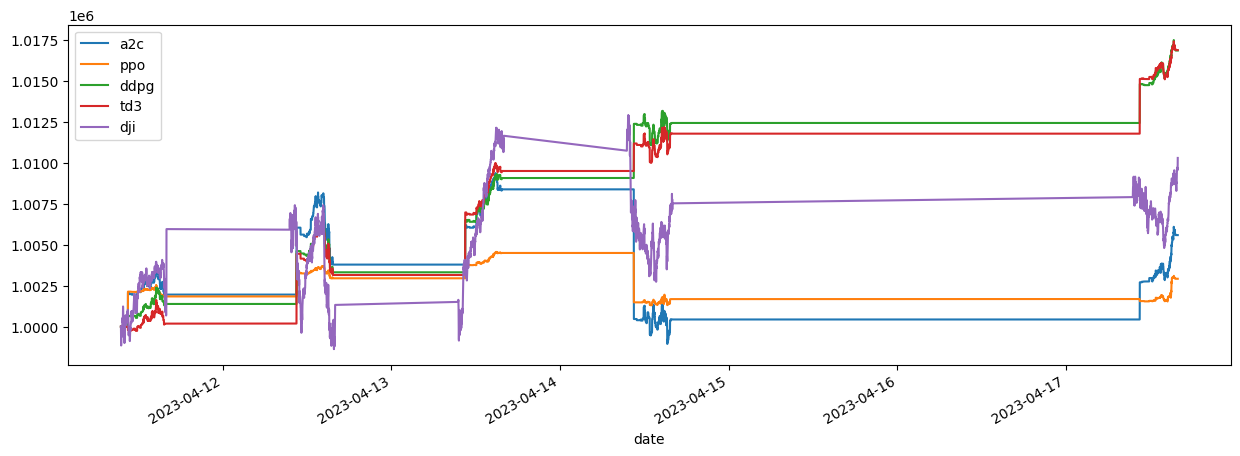

In [134]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();

In [184]:
# borrowing the implementation from finrl plot and still need to be updated
from copy import deepcopy
import pyfolio
from pyfolio import timeseries

def get_daily_return(df, value_col_name="account_value"):
    df = deepcopy(df)
    df["minutely_return"] = df[value_col_name].pct_change(1)
    df["date"] = pd.to_datetime(df["date"])
    df.set_index("date", inplace=True, drop=True)
    df.index = df.index.tz_localize("UTC")
    return pd.Series(df["minutely_return"], index=df.index)

def backtest_plot(
    account_value,
    baseline_start=config.TRADE_START_DATE,
    baseline_end=config.TRADE_END_DATE,
    baseline_ticker="^DJI",
    value_col_name="account_value",
):
    df = deepcopy(account_value)
    df["date"] = pd.to_datetime(df["date"])
    test_returns = get_daily_return(df, value_col_name=value_col_name)

    baseline_df = YahooDownloader(
        start_date=baseline_start, end_date=baseline_end, ticker_list=["^DJI"]
    ).fetch_data(interval='1D')

    baseline_df["date"] = pd.to_datetime(df["date"])
    baseline_df = pd.merge(df[["date"]], baseline_df, how="left", on="date")
    baseline_df = baseline_df.fillna(method="ffill").fillna(method="bfill")
    baseline_returns = get_daily_return(baseline_df, value_col_name="close")
    with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(
            returns=test_returns, benchmark_rets=baseline_returns, set_context=False
        )

<Figure size 1500x500 with 0 Axes>

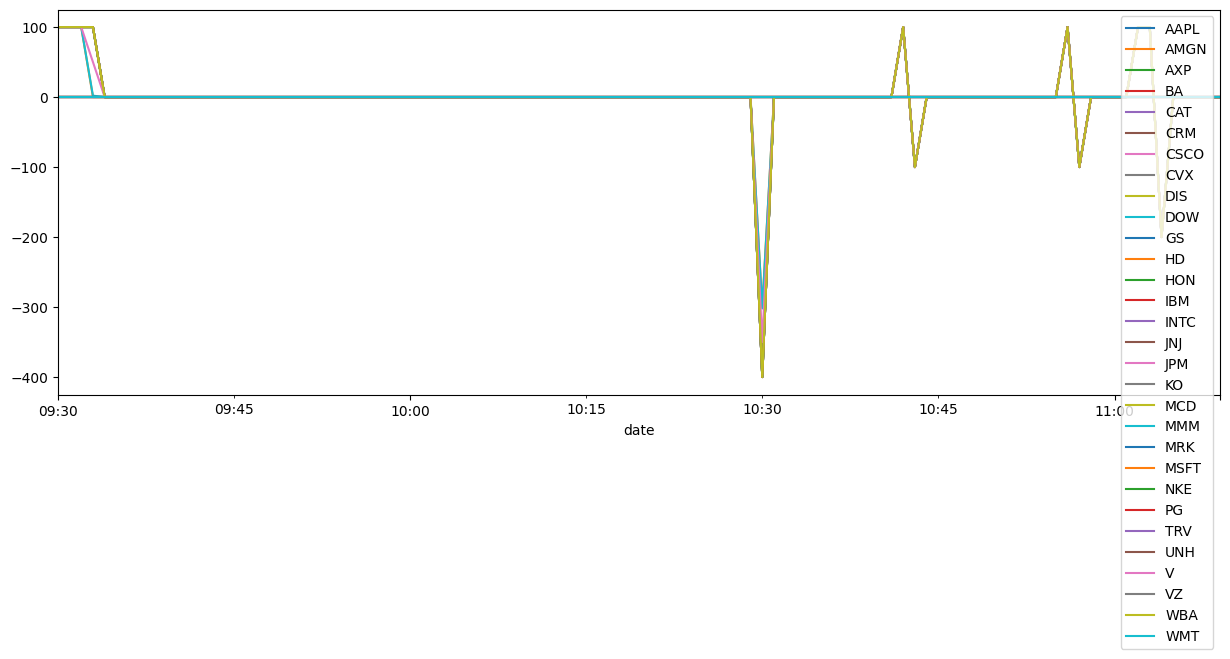

In [214]:
%matplotlib inline
plt.figure()
df_actions_td3.iloc[0:100].plot()
plt.legend(loc='best')

In [212]:
test_df[test_df['tic']=='AMGN'].loc[58:62]

,date,open,high,low,close,volume,tic,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
58,2023-04-11 10:28:00,250.93,250.930,250.93,250.93,0.0,AMGN,0.003952,250.930000,250.930000,54.965655,0.000000,24.470131,250.930000,250.930000,8.6500,0.110989
59,2023-04-11 10:29:00,250.93,250.930,250.93,250.93,0.0,AMGN,0.003661,250.930000,250.930000,54.965655,0.000000,24.470131,250.930000,250.930000,8.6500,0.117371
60,2023-04-11 10:30:00,252.44,252.465,252.29,252.34,4477.0,AMGN,0.115869,251.631071,250.369929,91.450578,1000.000000,99.005290,250.977000,250.953500,8.5200,45250.094011
61,2023-04-11 10:31:00,252.40,252.435,252.35,252.35,1920.0,AMGN,0.203259,251.942562,250.200438,91.501094,502.477291,99.005290,251.024333,250.977167,8.5390,109.974253
62,2023-04-11 10:32:00,252.32,252.430,252.32,252.43,1803.0,AMGN,0.275792,252.204508,250.088492,91.897320,337.025676,94.714077,251.074333,251.002167,8.5342,106.933213


A backtesting visualization on the algorithms will be performed here

In [213]:
df_backtest = deepcopy(df_account_value_a2c)
df_backtest['time'] = df_backtest['date'].apply(lambda x: x.strftime("%H:%M"))
df_backtest = df_backtest[df_backtest['time']=='15:59']
# df_backtest['date'] = df_backtest['date'].apply(lambda x: datetime.strptime(x.strftime("%Y-%m")))
df_backtest

,date,account_value,time
389,2023-04-11 15:59:00,1.001959e+06,15:59
779,2023-04-12 15:59:00,1.003790e+06,15:59
1169,2023-04-13 15:59:00,1.008383e+06,15:59
1559,2023-04-14 15:59:00,1.000440e+06,15:59
1949,2023-04-17 15:59:00,1.005591e+06,15:59


[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (5, 8)


<ipython-input-156-a0b3b6f716cb>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/usr/local/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.9/site-packages/empyrical/stats.py:1448: RuntimeWarning: Mean of empty slice
  ind_residual = independent - nanmean(independent, axis=0)
/usr/local/lib/python3.9/site-packages/empyrical/stats.py:1450: RuntimeWarning: Mean of empty slice
  covariances = nanmean(ind_residual * returns, axis=0)
/usr/local/lib/python3.9/site-packages/empyrical/stats.py:1457: RuntimeWarning: Mean of empty slice
  independent_variances = nanmean(ind_residual, axis=0)
/usr/local/lib/python3.9/site-packages/empyrical/stats.py:1291: RuntimeWa

Start date,2023-04-11
End date,2023-04-17
Total months,0
,Backtest
Annual return,20.001%
Cumulative returns,0.362%
Annual volatility,9.589%
Sharpe ratio,2.41
Calmar ratio,25.39
Stability,0.01
Max drawdown,-0.788%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,0.79,2023-04-13,2023-04-14,NaT,NaN
1,NaN,NaT,NaT,NaT,NaN
2,NaN,NaT,NaT,NaT,NaN
3,NaN,NaT,NaT,NaT,NaN
4,NaN,NaT,NaT,NaT,NaN


/usr/local/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.9/site-packages/pyfolio/timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warni

ConversionError: ignored

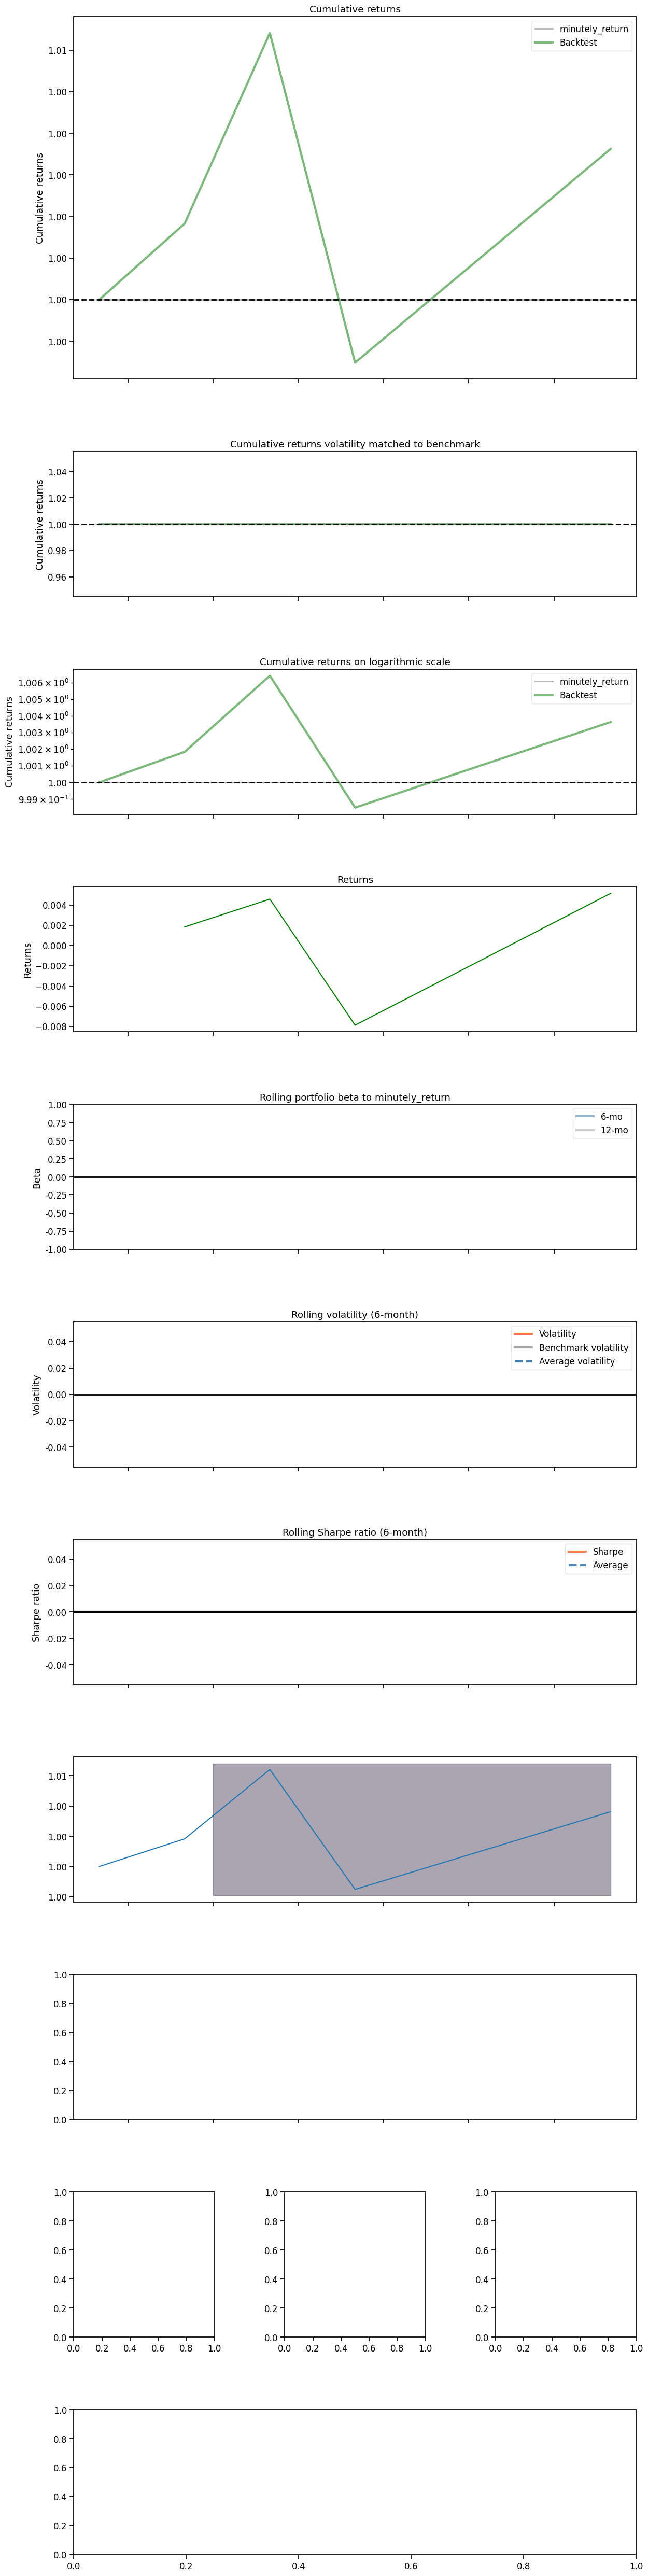

In [215]:
# # print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_backtest, 
             baseline_ticker = '^DJI', 
             baseline_start = df_account_value_td3.loc[0,'date'],
             baseline_end = df_account_value_td3.loc[len(df_account_value_td3)-1,'date'])

## Alpaca Environment Setup

In [216]:
from __future__ import annotations

import alpaca_trade_api as tradeapi
import exchange_calendars as tc
import numpy as np
import pandas as pd
import pytz
from stockstats import StockDataFrame as Sdf
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split


class AlpacaProcessor:
    def __init__(self, API_KEY=None, API_SECRET=None, API_BASE_URL=None, api=None):
        if api is None:
            try:
                self.api = tradeapi.REST(API_KEY, API_SECRET, API_BASE_URL, "v2")
            except BaseException:
                raise ValueError("Wrong Account Info!")
        else:
            self.api = api

    def download_data(
        self, ticker_list, start_date, end_date, time_interval
    ) -> pd.DataFrame:
        """
        ticker_list : list string of ticket
        time_interval: time interval
        start_date : start date of America/New_York time
        end_date : end date of America/New_York time
        The function tries to retrieve the data, between the start date and the end date, from the Alpaca server.
        if time_interval < 1D: period of data retrieved is the opening time of the New York Stock Exchange (NYSE) (from 9:30 am to 4:00 pm), in UTC offset zone.
        if time_interval >= 1D: each bar is the midnight of the day in America/New_York time, in UTC offset zone.
        """
        self.start = start_date
        self.end = end_date
        self.time_interval = time_interval

        # download
        NY = "America/New_York"
        start_date = pd.Timestamp(start_date + " 09:30:00", tz=NY)
        end_date = pd.Timestamp(end_date + " 15:59:00", tz=NY)
        barset = self.api.get_bars(
            ticker_list,
            time_interval,
            start=start_date.isoformat(),
            end=end_date.isoformat(),
        ).df

        # from trepan.api import debug;debug()
        # filter opening time of the New York Stock Exchange (NYSE) (from 9:30 am to 4:00 pm) if time_interval < 1D
        day_delta = 86400000000000  # pd.Timedelta('1D').delta == 86400000000000
        if pd.Timedelta(time_interval).delta < day_delta:
            NYSE_open_hour = "14:30"  # in UTC
            NYSE_close_hour = "20:59"  # in UTC
            data_df = barset.between_time(NYSE_open_hour, NYSE_close_hour)
        else:
            data_df = barset

        # reformat to finrl expected schema
        data_df = data_df.reset_index().rename(columns={"symbol": "tic"})
        data_df["timestamp"] = data_df["timestamp"].apply(lambda x: x.tz_convert(NY))

        return data_df

    def clean_data(self, df):
        tic_list = np.unique(df.tic.values)
        n_tickers = len(tic_list)

        # align start and end dates
        unique_times = df["timestamp"].unique()
        for time in unique_times:
            if len(df[df.timestamp == time].index) < n_tickers:
                df = df[df.timestamp != time]

        trading_days = self.get_trading_days(start=self.start, end=self.end)
        # produce full timestamp index
        times = []
        for day in trading_days:
            NY = "America/New_York"
            current_time = pd.Timestamp(day + " 09:30:00").tz_localize(NY)
            for i in range(390):
                times.append(current_time)
                current_time += pd.Timedelta(minutes=1)

        # create a new dataframe with full timestamp series
        new_df = pd.DataFrame()
        for tic in tic_list:
            tmp_df = pd.DataFrame(
                columns=["open", "high", "low", "close", "volume"], index=times
            )
            tic_df = df[df.tic == tic]
            for i in range(tic_df.shape[0]):
                tmp_df.loc[tic_df.iloc[i]["timestamp"]] = tic_df.iloc[i][
                    ["open", "high", "low", "close", "volume"]
                ]

            # if the close price of the first row is NaN
            if str(tmp_df.iloc[0]["close"]) == "nan":
                print(
                    "The price of the first row for ticker ",
                    tic,
                    " is NaN. ",
                    "It will filled with the first valid price.",
                )
                for i in range(tmp_df.shape[0]):
                    if str(tmp_df.iloc[i]["close"]) != "nan":
                        first_valid_price = tmp_df.iloc[i]["close"]
                        tmp_df.iloc[0] = [
                            first_valid_price,
                            first_valid_price,
                            first_valid_price,
                            first_valid_price,
                            0.0,
                        ]
                        break

            # if the close price of the first row is still NaN (All the prices are NaN in this case)
            if str(tmp_df.iloc[0]["close"]) == "nan":
                print(
                    "Missing data for ticker: ",
                    tic,
                    " . The prices are all NaN. Fill with 0.",
                )
                tmp_df.iloc[0] = [
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                ]

            # forward filling row by row
            for i in range(tmp_df.shape[0]):
                if str(tmp_df.iloc[i]["close"]) == "nan":
                    previous_close = tmp_df.iloc[i - 1]["close"]
                    if str(previous_close) == "nan":
                        raise ValueError
                    tmp_df.iloc[i] = [
                        previous_close,
                        previous_close,
                        previous_close,
                        previous_close,
                        0.0,
                    ]

            tmp_df = tmp_df.astype(float)
            tmp_df["tic"] = tic
            new_df = pd.concat([new_df, tmp_df])

        new_df = new_df.reset_index()
        new_df = new_df.rename(columns={"index": "timestamp"})

        # print("Data clean finished!")

        return new_df

    def add_technical_indicator(
        self,
        df,
        tech_indicator_list=[
            "macd",
            "boll_ub",
            "boll_lb",
            "rsi_30",
            "dx_30",
            "close_30_sma",
            "close_60_sma",
        ],
    ):
        df = df.rename(columns={"timestamp": "date"})
        df = df.copy()
        df = df.sort_values(by=["tic", "date"])
        stock = Sdf.retype(df.copy())
        unique_ticker = stock.tic.unique()
        tech_indicator_list = tech_indicator_list

        for indicator in tech_indicator_list:
            indicator_df = pd.DataFrame()
            for i in range(len(unique_ticker)):
                # print(unique_ticker[i], i)
                temp_indicator = stock[stock.tic == unique_ticker[i]][indicator]
                temp_indicator = pd.DataFrame(temp_indicator)
                temp_indicator["tic"] = unique_ticker[i]
                # print(len(df[df.tic == unique_ticker[i]]['date'].to_list()))
                temp_indicator["date"] = df[df.tic == unique_ticker[i]][
                    "date"
                ].to_list()
                indicator_df = pd.concat(
                    [indicator_df, temp_indicator], ignore_index=True
                )
            df = df.merge(
                indicator_df[["tic", "date", indicator]], on=["tic", "date"], how="left"
            )
        df = df.sort_values(by=["date", "tic"])
        df = df.rename(columns={"date": "timestamp"})
        #        print("Succesfully add technical indicators")
        return df

    def add_vix(self, data):
        vix_df = self.download_data(["VIXY"], self.start, self.end, self.time_interval)
        cleaned_vix = self.clean_data(vix_df)
        vix = cleaned_vix[["timestamp", "close"]]
        vix = vix.rename(columns={"close": "VIXY"})

        df = data.copy()
        df = df.merge(vix, on="timestamp")
        df = df.sort_values(["timestamp", "tic"]).reset_index(drop=True)
        return df

    def calculate_turbulence(self, data, time_period=252):
        # can add other market assets
        df = data.copy()
        df_price_pivot = df.pivot(index="timestamp", columns="tic", values="close")
        # use returns to calculate turbulence
        df_price_pivot = df_price_pivot.pct_change()

        unique_date = df.timestamp.unique()
        # start after a fixed timestamp period
        start = time_period
        turbulence_index = [0] * start
        # turbulence_index = [0]
        # print(start)
        # print(len(unique_date))
        count = 0
        for i in range(start, len(unique_date)):
            current_price = df_price_pivot[df_price_pivot.index == unique_date[i]]
            # use one year rolling window to calcualte covariance
            hist_price = df_price_pivot[
                (df_price_pivot.index < unique_date[i])
                & (df_price_pivot.index >= unique_date[i - time_period])
            ]
            # Drop tickers which has number missing values more than the "oldest" ticker
            filtered_hist_price = hist_price.iloc[
                hist_price.isna().sum().min() :
            ].dropna(axis=1)

            cov_temp = filtered_hist_price.cov()
            current_temp = current_price[[x for x in filtered_hist_price]] - np.mean(
                filtered_hist_price, axis=0
            )
            temp = current_temp.values.dot(np.linalg.pinv(cov_temp)).dot(
                current_temp.values.T
            )
            if temp > 0:
                count += 1
                if count > 2:
                    turbulence_temp = temp[0][0]
                else:
                    # avoid large outlier because of the calculation just begins
                    turbulence_temp = 0
            else:
                turbulence_temp = 0
            turbulence_index.append(turbulence_temp)

        turbulence_index = pd.DataFrame(
            {"timestamp": df_price_pivot.index, "turbulence": turbulence_index}
        )

        # print("turbulence_index\n", turbulence_index)

        return turbulence_index

    def add_turbulence(self, data, time_period=252):
        """
        add turbulence index from a precalcualted dataframe
        :param data: (df) pandas dataframe
        :return: (df) pandas dataframe
        """
        df = data.copy()
        turbulence_index = self.calculate_turbulence(df, time_period=time_period)
        df = df.merge(turbulence_index, on="timestamp")
        df = df.sort_values(["timestamp", "tic"]).reset_index(drop=True)
        return df

    def df_to_array(self, df, tech_indicator_list, if_vix):
        df = df.copy()
        unique_ticker = df.tic.unique()
        if_first_time = True
        for tic in unique_ticker:
            if if_first_time:
                price_array = df[df.tic == tic][["close"]].values
                tech_array = df[df.tic == tic][tech_indicator_list].values
                if if_vix:
                    turbulence_array = df[df.tic == tic]["VIXY"].values
                else:
                    turbulence_array = df[df.tic == tic]["turbulence"].values
                if_first_time = False
            else:
                price_array = np.hstack(
                    [price_array, df[df.tic == tic][["close"]].values]
                )
                tech_array = np.hstack(
                    [tech_array, df[df.tic == tic][tech_indicator_list].values]
                )
        #        print("Successfully transformed into array")
        return price_array, tech_array, turbulence_array

    def get_trading_days(self, start, end):
        nyse = tc.get_calendar("NYSE")
        df = nyse.sessions_in_range(
            pd.Timestamp(start, tz=pytz.UTC), pd.Timestamp(end, tz=pytz.UTC)
        )
        trading_days = []
        for day in df:
            trading_days.append(str(day)[:10])

        return trading_days

    def fetch_latest_data(
        self, ticker_list, time_interval, tech_indicator_list, limit=100
    ) -> pd.DataFrame:
        data_df = pd.DataFrame()
        ticker_list = ticker_list+["VIXY"]
        for tic in ticker_list:
            barset = self.api.get_bars([tic], time_interval, limit=limit).df  # [tic]
            barset["tic"] = tic
            barset = barset.reset_index()
            data_df = pd.concat([data_df, barset])

        data_df = data_df.reset_index(drop=True)
        start_time = data_df.timestamp.min()
        end_time = data_df.timestamp.max()
        # self.start = start_time.strftime("%Y-%m-%d")
        # self.end = end_time.strftime("%Y-%m-%d")
        # self.time_interval = time_interval
        times = []
        current_time = start_time
        end = end_time + pd.Timedelta(minutes=1)
        while current_time != end:
            times.append(current_time)
            current_time += pd.Timedelta(minutes=1)

        df = data_df.copy()
        new_df = pd.DataFrame()
        for tic in ticker_list:
            tmp_df = pd.DataFrame(
                columns=["open", "high", "low", "close", "volume"], index=times
            )
            tic_df = df[df.tic == tic]
            for i in range(tic_df.shape[0]):
                tmp_df.loc[tic_df.iloc[i]["timestamp"]] = tic_df.iloc[i][
                    ["open", "high", "low", "close", "volume"]
                ]

                if str(tmp_df.iloc[0]["close"]) == "nan":
                    for i in range(tmp_df.shape[0]):
                        if str(tmp_df.iloc[i]["close"]) != "nan":
                            first_valid_close = tmp_df.iloc[i]["close"]
                            tmp_df.iloc[0] = [
                                first_valid_close,
                                first_valid_close,
                                first_valid_close,
                                first_valid_close,
                                0.0,
                            ]
                            break
                if str(tmp_df.iloc[0]["close"]) == "nan":
                    print(
                        "Missing data for ticker: ",
                        tic,
                        " . The prices are all NaN. Fill with 0.",
                    )
                    tmp_df.iloc[0] = [
                        0.0,
                        0.0,
                        0.0,
                        0.0,
                        0.0,
                    ]

            for i in range(tmp_df.shape[0]):
                if str(tmp_df.iloc[i]["close"]) == "nan":
                    previous_close = tmp_df.iloc[i - 1]["close"]
                    if str(previous_close) == "nan":
                        previous_close = 0.0
                    tmp_df.iloc[i] = [
                        previous_close,
                        previous_close,
                        previous_close,
                        previous_close,
                        0.0,
                    ]
            tmp_df = tmp_df.astype(float)
            tmp_df["tic"] = tic
            new_df = pd.concat([new_df, tmp_df])

        new_df = new_df.reset_index()
        new_df = new_df.rename(columns={"index": "timestamp"})

        df = self.add_technical_indicator(new_df, tech_indicator_list)
        df = self.add_turbulence(df)
        # df = self.add_vix(df)
        # df["VIXY"] = 0
        # price_array, tech_array, turbulence_array = self.df_to_array(
        #     df, tech_indicator_list, if_vix=True
        # )
        # latest_price = price_array[-1]
        # latest_tech = tech_array[-1]
        vix_df = df[df['tic']=='VIXY'][["timestamp", "close"]].rename(columns={"close":"VIXY"})
        df = df[~(df['tic']=='VIXY')]
        df = df.merge(vix_df, on="timestamp").rename(columns={"timestamp":"date"})
        df = data_split(df, start_time, end_time+timedelta(1))
        turb_df = self.api.get_bars(["VIXY"], time_interval, limit=1).df
        latest_turb = turb_df["close"].values
        return df, latest_turb
        # return latest_price, latest_tech, latest_turb

In [237]:
import datetime
import threading
# from finrl.meta.data_processors.processor_alpaca import AlpacaProcessor
import alpaca_trade_api as tradeapi
import time
import pandas as pd
import numpy as np
import torch
import gym

class AlpacaPaperTrading():

    def __init__(self,ticker_list, time_interval, drl_lib, agent, cwd, net_dim, 
                 state_dim, action_dim, API_KEY, API_SECRET, 
                 API_BASE_URL, tech_indicator_list, turbulence_thresh=30, 
                 max_stock=1e2, latency = None):
        #load agent
        self.drl_lib = drl_lib
        # state = self.get_state()
        # env_kwargs = {
        #     "hmax": 100,
        #     "initial_amount": self.cash,
        #     "num_stock_shares": list(self.stocks) if len(self.stocks)==stock_dimension else [0]*stock_dimension,
        #     "buy_cost_pct": buy_cost_list,
        #     "sell_cost_pct": sell_cost_list,
        #     "state_space": state_space,
        #     "stock_dim": stock_dimension,
        #     "tech_indicator_list": INDICATORS,
        #     "action_space": stock_dimension,
        #     "reward_scaling": 1e-4
        # }
        # e_trade_gym = StockTradingEnv(df = state, turbulence_threshold = 30, **env_kwargs)
        # env_trade, obs_trade = e_trade_gym.get_sb_env()
        if agent=="a2c":
            if drl_lib == 'stable_baselines3':
                try:
                    #load agent
                    cwd = cwd + 'a2cmodel-alpaca1mindata.zip'
                    env_trade, _ = e_train_gym.get_sb_env()
                    self.model = DRLAgent(env = env_trade).get_model("a2c").load(cwd)
                    print("Successfully load model", cwd)
                except:
                    raise ValueError('Fail to load agent!')
                    
            else:
                raise ValueError('The DRL library input is NOT supported yet. Please check your input.')
        elif agent=="ppo":
            if drl_lib == 'stable_baselines3':
                try:
                    #load agent
                    cwd = cwd + 'ppomodel-alpaca1mindata.zip'
                    env_trade, _ = e_train_gym.get_sb_env()
                    self.model = DRLAgent(env = env_trade).get_model("ppo").load(cwd)
                    print("Successfully load model", cwd)
                except:
                    raise ValueError('Fail to load agent!')
                    
            else:
                raise ValueError('The DRL library input is NOT supported yet. Please check your input.')
        elif agent=="ddpg":
            if drl_lib == 'stable_baselines3':
                try:
                    #load agent
                    cwd = cwd + 'ddpgmodel-alpaca1mindata.zip'
                    env_trade, _ = e_train_gym.get_sb_env()
                    self.model = DRLAgent(env = env_trade).get_model("ddpg").load(cwd)
                    print("Successfully load model", cwd)
                except:
                    raise ValueError('Fail to load agent!')
                    
            else:
                raise ValueError('The DRL library input is NOT supported yet. Please check your input.')
        elif agent=="td3":
            if drl_lib == 'stable_baselines3':
                try:
                    #load agent
                    cwd = cwd + 'td3model-alpaca1mindata.zip'
                    env_trade, _ = e_train_gym.get_sb_env()
                    self.model = DRLAgent(env = env_trade).get_model("td3").load(cwd)
                    print("Successfully load model", cwd)
                except:
                    raise ValueError('Fail to load agent!')
                    
            else:
                raise ValueError('The DRL library input is NOT supported yet. Please check your input.')
        else:
            raise ValueError('Agent input is NOT supported yet.')
            
            
            
        #connect to Alpaca trading API
        try:
            self.alpaca = tradeapi.REST(API_KEY,API_SECRET,API_BASE_URL, 'v2')
        except:
            raise ValueError('Fail to connect Alpaca. Please check account info and internet connection.')
        
        #read trading time interval
        if time_interval == '1s':
            self.time_interval = 1
        elif time_interval == '5s':
            self.time_interval = 5
        elif time_interval == '1Min':
            self.time_interval = 60
        elif time_interval == '5Min':
            self.time_interval = 60 * 5
        elif time_interval == '15Min':
            self.time_interval = 60 * 15
        elif time_interval == '1day':
            self.time_interval = 3600*24
        else:
            raise ValueError('Time interval input is NOT supported yet.')
        
        #read trading settings
        self.tech_indicator_list = tech_indicator_list
        self.turbulence_thresh = turbulence_thresh
        self.max_stock = max_stock 
        
        #initialize account
        self.stocks = np.asarray([0] * len(ticker_list)) #stocks holding
        self.stocks_cd = np.zeros_like(self.stocks) 
        self.cash = None #cash record 
        self.stocks_df = pd.DataFrame(self.stocks, columns=['stocks'], index = ticker_list)
        self.asset_list = []
        self.price = np.asarray([0] * len(ticker_list))
        self.stockUniverse = ticker_list
        self.turbulence_bool = 0
        self.equities = []
        
    def test_latency(self, test_times = 10): 
        total_time = 0
        for i in range(0, test_times):
            time0 = time.time()
            self.get_state()
            time1 = time.time()
            temp_time = time1 - time0
            total_time += temp_time
        latency = total_time/test_times
        print('latency for data processing: ', latency)
        return latency
        
    def run(self):
        orders = self.alpaca.list_orders(status="open")
        for order in orders:
          self.alpaca.cancel_order(order.id)
    
        # Wait for market to open.
        print("Waiting for market to open...")
        self.awaitMarketOpen()
        print("Market opened.")

        while True:

          # Figure out when the market will close so we can prepare to sell beforehand.
          clock = self.alpaca.get_clock()
          closingTime = clock.next_close.replace(tzinfo=datetime.timezone.utc).timestamp()
          currTime = clock.timestamp.replace(tzinfo=datetime.timezone.utc).timestamp()
          self.timeToClose = closingTime - currTime
    
          if(self.timeToClose < (60)):
            # Close all positions when 1 minutes til market close.
            print("Market closing soon. Stop trading.")
            break
            
            '''# Close all positions when 1 minutes til market close.
            print("Market closing soon.  Closing positions.")

            threads = []
            positions = self.alpaca.list_positions()
            for position in positions:
              if(position.side == 'long'):
                orderSide = 'sell'
              else:
                orderSide = 'buy'
              qty = abs(int(float(position.qty)))
              respSO = []
              tSubmitOrder = threading.Thread(target=self.submitOrder(qty, position.symbol, orderSide, respSO))
              tSubmitOrder.start()
              threads.append(tSubmitOrder)    # record thread for joining later

            for x in threads:   #  wait for all threads to complete
                x.join()     
            # Run script again after market close for next trading day.
            print("Sleeping until market close (15 minutes).")
            time.sleep(60 * 15)'''
            
          else:
            self.trade()
            last_equity = float(self.alpaca.get_account().last_equity)
            cur_time = time.time()
            self.equities.append([cur_time,last_equity])
            time.sleep(self.time_interval)
            
    def awaitMarketOpen(self):
        isOpen = self.alpaca.get_clock().is_open
        while(not isOpen):
          clock = self.alpaca.get_clock()
          openingTime = clock.next_open.replace(tzinfo=datetime.timezone.utc).timestamp()
          currTime = clock.timestamp.replace(tzinfo=datetime.timezone.utc).timestamp()
          timeToOpen = int((openingTime - currTime) / 60)
          print(str(timeToOpen) + " minutes til market open.")
          time.sleep(60)
          isOpen = self.alpaca.get_clock().is_open
    
    def trade(self):
        state = self.get_state()
        
        if self.drl_lib == 'elegantrl':
            with torch.no_grad():
                s_tensor = torch.as_tensor((state,), device=self.device)
                a_tensor = self.act(s_tensor)  
                action = a_tensor.detach().cpu().numpy()[0]  
            action = (action * self.max_stock).astype(int)
            
        elif self.drl_lib == 'rllib':
            action = self.agent.compute_single_action(state)
        
        elif self.drl_lib == 'stable_baselines3':
                env_kwargs = {
                    "hmax": 100,
                    "initial_amount": self.cash,
                    "num_stock_shares": list(self.stocks) if len(self.stocks)==stock_dimension else [0]*stock_dimension,
                    "buy_cost_pct": buy_cost_list,
                    "sell_cost_pct": sell_cost_list,
                    "state_space": state_space,
                    "stock_dim": stock_dimension,
                    "tech_indicator_list": INDICATORS,
                    "action_space": stock_dimension,
                    "reward_scaling": 1e-4
                }
                e_trade_gym = StockTradingEnv(df = state, turbulence_threshold = 30, **env_kwargs)
                env_trade, obs_trade = e_trade_gym.get_sb_env()
                env_trade.reset()
                action, _states = trained_a2c.predict(obs_trade, deterministic=True)
                obs_trade, rewards, dones, info = env_trade.step(action)
                action = env_trade.env_method(method_name="save_action_memory")
                action = np.array(action)[0]
        else:
            raise ValueError('The DRL library input is NOT supported yet. Please check your input.')
        
        self.stocks_cd += 1
        if self.turbulence_bool == 0:
            min_action = 0  # stock_cd
            threads = []
            for index in np.where(action[0] < -min_action)[0]:  # sell_index:
                print(f"stocks[{index}] = {self.stocks[index]}")
                print(f"action[{index}] = {-action[0][index]}")
                sell_num_shares = min(self.stocks[index], -action[0][index])
                qty =  abs(int(sell_num_shares))
                respSO = []
                tSubmitOrder = threading.Thread(target=self.submitOrder(qty, self.stockUniverse[index], 'sell', respSO))
                tSubmitOrder.start()
                threads.append(tSubmitOrder)    # record thread for joining later
                self.cash = float(self.alpaca.get_account().cash)
                self.stocks_cd[index] = 0
            
            for x in threads:   #  wait for all threads to complete
                x.join()     

            threads = []
            for index in np.where(action[0] > min_action)[0]:  # buy_index:
                if self.cash < 0:
                    tmp_cash = 0
                else:
                    tmp_cash = self.cash
                buy_num_shares = min(tmp_cash // self.price[index], abs(int(action[0][index])))
                if (buy_num_shares != buy_num_shares): # if buy_num_change = nan
                    qty = 0 # set to 0 quantity
                else:
                    qty = abs(int(buy_num_shares))
                qty = abs(int(buy_num_shares))
                respSO = []
                tSubmitOrder = threading.Thread(target=self.submitOrder(qty, self.stockUniverse[index], 'buy', respSO))
                tSubmitOrder.start()
                threads.append(tSubmitOrder)    # record thread for joining later
                self.cash = float(self.alpaca.get_account().cash)
                self.stocks_cd[index] = 0

            for x in threads:   #  wait for all threads to complete
                x.join()     
                
        else:  # sell all when turbulence
            threads = []
            positions = self.alpaca.list_positions()
            for position in positions:
                if(position.side == 'long'):
                    orderSide = 'sell'
                else:
                    orderSide = 'buy'
                qty = abs(int(float(position.qty)))
                respSO = []
                tSubmitOrder = threading.Thread(target=self.submitOrder(qty, position.symbol, orderSide, respSO))
                tSubmitOrder.start()
                threads.append(tSubmitOrder)    # record thread for joining later

            for x in threads:   #  wait for all threads to complete
                x.join()     
            
            self.stocks_cd[:] = 0
            
    
    def get_state(self):
        alpaca = AlpacaProcessor(api=self.alpaca)
        stocks_df, turbulence = alpaca.fetch_latest_data(ticker_list = self.stockUniverse, time_interval='1Min',
                                                     tech_indicator_list=self.tech_indicator_list)
        turbulence_bool = 1 if turbulence >= self.turbulence_thresh else 0
        self.turbulence_bool = turbulence_bool
        stocks_df = stocks_df.fillna(method="ffill").fillna(method="bfill").replace([np.inf, -np.inf], 0).rename(columns={"VIXY":"vix"})
        # stocks_df['date'] = stocks_df['date'].dt.tz_localize(None)
        # turbulence = (self.sigmoid_sign(turbulence, self.turbulence_thresh) * 2 ** -5).astype(np.float32)
        
        # tech = tech * 2 ** -7
        positions = self.alpaca.list_positions()
        # # print(positions)
        stocks = [0] * len(self.stockUniverse)
        for position in positions:
            ind = self.stockUniverse.index(position.symbol)
            stocks[ind] = ( abs(int(float(position.qty))))
        
        stocks = np.asarray(stocks, dtype = float)
        cash = float(self.alpaca.get_account().cash)
        self.cash = cash
        self.stocks = stocks
        return stocks_df
        
    def submitOrder(self, qty, stock, side, resp):
        if(qty > 0):
          try:
            self.alpaca.submit_order(stock, qty, side, "market", "day")
            print("Market order of | " + str(qty) + " " + stock + " " + side + " | completed.")
            resp.append(True)
          except:
            print("Order of | " + str(qty) + " " + stock + " " + side + " | did not go through.")
            resp.append(False)
        else:
          print("Quantity is 0, order of | " + str(qty) + " " + stock + " " + side + " | not completed.")
          resp.append(True)

    @staticmethod
    def sigmoid_sign(ary, thresh):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x * np.e)) - 0.5

        return sigmoid(ary / thresh) * thresh
    
class StockEnvEmpty(gym.Env):
    #Empty Env used for loading rllib agent
    def __init__(self,config):
      state_dim = config['state_dim']
      action_dim = config['action_dim']
      self.env_num = 1
      self.max_step = 10000
      self.env_name = 'StockEnvEmpty'
      self.state_dim = state_dim  
      self.action_dim = action_dim
      self.if_discrete = False  
      self.target_return = 9999
      self.observation_space = gym.spaces.Box(low=-3000, high=3000, shape=(state_dim,), dtype=np.float32)
      self.action_space = gym.spaces.Box(low=-1, high=1, shape=(action_dim,), dtype=np.float32)
        
    def reset(self):
        return 

    def step(self, actions):
        return

In [238]:
DOW_30_TICKER = config_tickers.DOW_30_TICKER

In [239]:
tickers = list(train_df["tic"].unique())
ERL_PARAMS = {"learning_rate": 3e-6,"batch_size": 2048,"gamma":  0.985,
        "seed":312,"net_dimension":[128,64], "target_step":5000, "eval_gap":30,
        "eval_times":1} 
action_dim = len(train_df["tic"].unique())
API_BASE_URL = 'https://paper-api.alpaca.markets'
# state_dim = 1 + 2 + 3 * action_dim + len(INDICATORS) * action_dim

In [240]:
paper_trading_erl = AlpacaPaperTrading(ticker_list = tickers, 
                                       time_interval = '1Min', 
                                       drl_lib = 'stable_baselines3', 
                                       agent = 'td3', 
                                       cwd = './trained_models/', 
                                       net_dim = ERL_PARAMS['net_dimension'], 
                                       state_dim = state_space, 
                                       action_dim= action_dim, 
                                       API_KEY = API_KEY, 
                                       API_SECRET = API_SECRET, 
                                       API_BASE_URL = API_BASE_URL, 
                                       tech_indicator_list = INDICATORS, 
                                       turbulence_thresh=30, 
                                       max_stock=1e2)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device
Successfully load model ./trained_models/td3model-alpaca1mindata.zip


In [241]:
paper_trading_erl.run()

Waiting for market to open...
104 minutes til market open.


KeyboardInterrupt: ignored

In [ ]:
paper_trading_erl.run()

Waiting for market to open...
Market opened.
stocks[3] = 100.0
action[3] = 100
Market order of | 100 BA sell | completed.
stocks[5] = 58.0
action[5] = 58
Market order of | 58 CRM sell | completed.
stocks[8] = 1.0
action[8] = 1
Market order of | 1 DIS sell | completed.
stocks[11] = 11.0
action[11] = 11
Market order of | 11 HD sell | completed.
stocks[12] = 89.0
action[12] = 7
Market order of | 7 HON sell | completed.
stocks[19] = 227.0
action[19] = 100
Market order of | 100 MMM sell | completed.
stocks[25] = 49.0
action[25] = 49
Market order of | 49 UNH sell | completed.
stocks[29] = 200.0
action[29] = 100
Market order of | 100 WMT sell | completed.


<ipython-input-103-b63891023a79>:282: RuntimeWarning: divide by zero encountered in long_scalars
  buy_num_shares = min(tmp_cash // self.price[index], abs(int(action[0][index])))
<ipython-input-103-b63891023a79>:282: RuntimeWarning: divide by zero encountered in floor_divide
  buy_num_shares = min(tmp_cash // self.price[index], abs(int(action[0][index])))


Quantity is 0, order of | 0 GS buy | not completed.
Quantity is 0, order of | 0 MCD buy | not completed.
Market order of | 100 VZ buy | completed.
Market order of | 2 WBA buy | completed.
stocks[1] = 6.0
action[1] = 4
Market order of | 4 AMGN sell | completed.
stocks[26] = 63.0
action[26] = 39
Market order of | 39 V sell | completed.
stocks[27] = 100.0
action[27] = 100
Market order of | 100 VZ sell | completed.
stocks[28] = 2.0
action[28] = 2
Market order of | 2 WBA sell | completed.


<ipython-input-103-b63891023a79>:282: RuntimeWarning: divide by zero encountered in floor_divide
  buy_num_shares = min(tmp_cash // self.price[index], abs(int(action[0][index])))


Market order of | 100 HD buy | completed.
Market order of | 68 IBM buy | completed.
Market order of | 1 INTC buy | completed.
Market order of | 100 WMT buy | completed.
stocks[1] = 2.0
action[1] = 1
Market order of | 1 AMGN sell | completed.
stocks[12] = 82.0
action[12] = 33
Market order of | 33 HON sell | completed.
stocks[26] = 24.0
action[26] = 24
Market order of | 24 V sell | completed.
Market order of | 1 JPM buy | completed.


<ipython-input-103-b63891023a79>:282: RuntimeWarning: divide by zero encountered in floor_divide
  buy_num_shares = min(tmp_cash // self.price[index], abs(int(action[0][index])))


Market order of | 85 WMT buy | completed.


KeyboardInterrupt: ignored

In [ ]:
state = paper_trading_erl.get_state()

In [ ]:
len(state[2])

30

In [ ]:
stock_dimension = len(state.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 301


In [ ]:
last_index = state.index.max()
last_state = state.loc[last_index-1:last_index,:]
last_state.index = [0]*30+[1]*30
# last_state

,date,open,high,low,close,volume,tic,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence,vix
0,2023-03-28 15:19:00+00:00,157.6400,157.6400,157.6400,157.6400,0.0,AAPL,-2.164796e-08,157.640000,157.640000,49.278391,0.000000,11.832560,157.640000,157.640000,1.660243,9.42
0,2023-03-28 15:19:00+00:00,237.6800,237.6800,237.6800,237.6800,0.0,AMGN,6.609508e-02,237.789097,237.528063,55.350202,59.271401,17.955391,237.535803,237.468985,1.660243,9.42
0,2023-03-28 15:19:00+00:00,161.2350,161.2350,161.2350,161.2350,0.0,AXP,-5.765816e-02,161.322721,161.162749,42.001417,-30.791807,12.322093,161.283823,161.517950,1.660243,9.42
0,2023-03-28 15:19:00+00:00,204.9900,204.9900,204.9900,204.9900,0.0,BA,-7.911953e-03,204.990000,204.990000,56.162673,0.000000,0.324504,204.990000,205.135353,1.660243,9.42
0,2023-03-28 15:19:00+00:00,218.9650,218.9650,218.9650,218.9650,0.0,CAT,-4.351211e-02,219.102910,218.873090,45.794963,-48.057805,16.842658,219.028380,219.175143,1.660243,9.42
0,2023-03-28 15:19:00+00:00,191.3800,191.3800,191.3800,191.3800,0.0,CRM,-3.165727e-02,191.380000,191.380000,46.823461,-44.377923,13.200233,191.423003,191.483203,1.660243,9.42
0,2023-03-28 15:19:00+00:00,50.4450,50.4450,50.4450,50.4450,0.0,CSCO,7.674358e-03,50.445000,50.445000,52.864389,48.236666,24.415574,50.436133,50.413525,1.660243,9.42
0,2023-03-28 15:19:00+00:00,158.8500,158.8500,158.8500,158.8500,0.0,CVX,-1.224412e-02,158.850000,158.850000,50.933327,-38.461538,12.541324,158.852667,158.946370,1.660243,9.42
0,2023-03-28 15:19:00+00:00,95.5920,95.5920,95.5920,95.5920,0.0,DIS,-1.088178e-03,95.592000,95.592000,50.242863,0.000000,9.873089,95.592000,95.597272,1.660243,9.42
0,2023-03-28 15:19:00+00:00,52.7150,52.7150,52.7150,52.7150,0.0,DOW,1.748673e-02,52.756167,52.693203,58.546938,27.186647,19.659163,52.704290,52.628687,1.660243,9.42


In [ ]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [50] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": -50.5,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "turbulence_threshold": 30,
    "reward_scaling": 1e-4
}

e_trade_gym = StockTradingEnv(df = state[0], risk_indicator_col='vix', **env_kwargs)
# e_train_gym = StockTradingEnv(df=state, **env_kwargs)

In [ ]:
env_trade, obs_trade = e_trade_gym.get_sb_env()
env_trade.reset()
action, _states = trained_a2c.predict(obs_trade, deterministic=True)

In [ ]:
trained_a2c.predict(obs_trade, deterministic=True)[1]

array([[ 1.   , -0.148, -1.   ,  1.   ,  0.349,  1.   , -0.142, -1.   ,
         1.   ,  1.   , -0.56 ,  1.   ,  1.   , -1.   ,  1.   ,  1.   ,
        -0.054, -1.   ,  0.382,  1.   ,  1.   ,  1.   ,  1.   , -0.474,
        -0.104,  1.   ,  1.   , -0.348,  0.786,  1.   ]], dtype=float32)

In [ ]:
len(action[0])

30

In [ ]:
obs_trade, rewards, dones, info = env_trade.step(action)
res = env_trade.env_method(method_name="save_action_memory")
res = np.array(res)

In [ ]:
res = env_trade.env_method(method_name="save_action_memory")
res

[                           AAPL  AMGN  AXP   BA  CAT  CRM  CSCO  CVX  DIS  \
 date                                                                        
 2023-03-28 08:00:00+00:00     0    -9  -50  100    0   58   -15  -50    1   
 
                            DOW  ...  MRK  MSFT  NKE  PG  TRV  UNH  V  VZ  WBA  \
 date                            ...                                             
 2023-03-28 08:00:00+00:00    0  ...    0     0    0 -48  -12    0  0 -37    0   
 
                            WMT  
 date                            
 2023-03-28 08:00:00+00:00  100  
 
 [1 rows x 30 columns]]

In [ ]:
res2 = np.array(res)[0]
res2

array([[  0,  -9, -50, 100,   0,  58, -15, -50,   1,   0, -50,   0,   0,
        -50,   0,   0,  -9, -50,   0, 100,   0,   0,   0, -48, -12,   0,
          0, -37,   0, 100]])

In [ ]:
for index in np.where(res2[0] < 0):
  print(index)

[ 1  2  6  7 10 13 16 17 23 24 27]


In [ ]:
a2c_account, a2c_actions = DRLAgent.DRL_prediction(
    model=trained_a2c,
    environment = e_trade_gym
)

hit end!


In [ ]:
a2c_account

,date,account_value
0,2023-03-28 15:19:00+00:00,251416.145000
1,2023-03-28 15:20:00+00:00,251301.319372


In [ ]:
a2c_actions

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
date,,,,,,,,,,,,,,,,,,,,,
2023-03-28 15:19:00+00:00,0,-20,-50,100,0,82,-12,-50,1,1,...,0,0,0,-47,-6,0,0,-30,0,100


In [ ]:
account_ppo, actions_ppo = DRLAgent.DRL_prediction(
    model= trained_ppo, 
    environment = e_trade_gym)

hit end!


In [ ]:
account_ppo

,date,account_value
0,2023-03-28 08:00:00,1000000.000000
1,2023-03-28 08:01:00,999973.598485
2,2023-03-28 08:02:00,999949.409180
3,2023-03-28 08:03:00,999922.099875
4,2023-03-28 08:04:00,999897.911610
...,...,...
436,2023-03-28 15:16:00,998246.624335
437,2023-03-28 15:17:00,998233.296432
438,2023-03-28 15:18:00,998254.966695
439,2023-03-28 15:19:00,998283.958792


In [ ]:
actions

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
date,,,,,,,,,,,,,,,,,,,,,
2023-02-27 09:30:00,100,0,0,100,70,66,18,0,100,100,...,100,100,100,5,57,100,100,0,0,100
2023-02-27 09:31:00,100,0,0,100,70,66,18,0,100,100,...,100,100,100,5,57,100,100,0,0,100
2023-02-27 09:32:00,100,0,0,100,70,66,18,0,100,100,...,100,100,100,5,57,100,100,0,0,100
2023-02-27 09:33:00,0,0,0,0,0,0,-6,0,0,0,...,0,0,0,-15,0,0,0,0,0,70
2023-02-27 09:34:00,0,0,0,0,0,0,-12,0,0,0,...,0,0,0,0,-9,0,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-21 14:55:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-03-21 14:56:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-03-21 14:57:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
state[0]

array([-0.018,  0.193,  0.   ,  2.463,  0.   ,  2.547,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  1.496,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.454,  0.   ,  2.02 ,  0.96 ,  0.   ,  1.589,  0.   ,
        4.305,  0.   ,  0.   ,  0.   ,  0.   ,  3.469,  0.594,  0.53 ,
        0.   ,  0.   ,  0.797,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.312,  0.172,  1.391,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  1.984,  0.   ,  0.   ,  0.   ,
        0.906,  0.   ,  0.766,  0.984,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.231,  1.231,
        0.429,  0.295,  0.109,  1.231,  1.231,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.273,  1.273,
      

In [ ]:
state[1]

-72.9

In [ ]:
state[2]

array([157.6 ,   0.  , 163.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
        95.73,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,  29.03,   0.  ,
       129.26,  61.45,   0.  , 101.7 ,   0.  , 275.49,   0.  ,   0.  ,
         0.  ,   0.  , 222.  ,  38.01,  33.95,   0.  ])

In [ ]:
state[3]

array([ 0.   ,  1.231,  1.231,  0.429,  0.295,  0.109,  1.231,  1.231,
        0.   ,  0.   ,  0.   ,    nan,    nan,    nan,  0.   ,  0.   ,
        0.   ,  1.273,  1.273,    nan,    nan,    nan,  1.273,  1.273,
        0.   ,  0.   ,  0.   ,    nan,    nan,    nan,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,    nan,    nan,    nan,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,    nan,    nan,    nan,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,    nan,    nan,    nan,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,    nan,    nan,    nan,  0.   ,  0.   ,
        0.   ,  0.748,  0.748,    nan,    nan,    nan,  0.748,  0.748,
        0.   ,  0.   ,  0.   ,    nan,    nan,    nan,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,    nan,    nan,    nan,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,    nan,    nan,    nan,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,    nan,    nan,    nan,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,    nan,    nan,    nan,  0.   ,  0.   ,
      

In [ ]:
paper_trading_erl.trade()

30


ValueError: ignored

In [ ]:
# paper_trading_erl = AlpacaPaperTrading(ticker_list = DOW_30_TICKER, 
#                                        time_interval = '1day', 
#                                        drl_lib = 'stable_baselines3', 
#                                        agent = 'a2c', 
#                                        cwd = './trained_models/a2cmodel', 
#                                        net_dim = ERL_PARAMS['net_dimension'], 
#                                        state_dim = state_space, 
#                                        action_dim= action_dim, 
#                                        API_KEY = API_KEY, 
#                                        API_SECRET = API_SECRET, 
#                                        API_BASE_URL = API_BASE_URL, 
#                                        tech_indicator_list = INDICATORS, 
#                                        turbulence_thresh=30, 
#                                        max_stock=1e2)
# paper_trading_erl.run()